In [330]:
## House Price Predication Case Study

## Importing Necessary Libraries

In [432]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [434]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Dataset Loading

In [435]:
# Importing housing_data.csv
housing_data = pd.read_csv('housing_data.csv')

In [436]:
# Looking at the first five rows
housing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [437]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 ## Data Cleaning and Refining and Handle the Missing Values 

In [438]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [441]:
# We can find these features on the description data file provided mentioning these null values are mapped to none

nan_to_none_cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in nan_to_none_cols:
    housing_data[i].fillna("None", inplace=True)

In [442]:
 # Using the klib lib to perform cleaning of data
import klib

In [443]:
# Performing cleaning
housing_data = klib.data_cleaning(housing_data)

Shape of cleaned data: (1460, 81) - Remaining NAs: 357


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.73 MB (-81.11%)



In [444]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1460 non-null   int16   
 1   mssub_class      1460 non-null   int16   
 2   mszoning         1460 non-null   category
 3   lot_frontage     1201 non-null   float32 
 4   lot_area         1460 non-null   int32   
 5   street           1460 non-null   category
 6   alley            1460 non-null   category
 7   lot_shape        1460 non-null   category
 8   land_contour     1460 non-null   category
 9   utilities        1460 non-null   category
 10  lot_config       1460 non-null   category
 11  land_slope       1460 non-null   category
 12  neighborhood     1460 non-null   category
 13  condition1       1460 non-null   category
 14  condition2       1460 non-null   category
 15  bldg_type        1460 non-null   category
 16  house_style      1460 non-null   category


In [445]:
# Below code gives list of columns having more than 60% null value
null_percentage = housing_data.isnull().sum()/housing_data.shape[0]*100
col_to_drop = null_percentage[null_percentage>60].keys()

In [446]:
col_to_drop

Index([], dtype='object')

In [447]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1460 non-null   int16   
 1   mssub_class      1460 non-null   int16   
 2   mszoning         1460 non-null   category
 3   lot_frontage     1201 non-null   float32 
 4   lot_area         1460 non-null   int32   
 5   street           1460 non-null   category
 6   alley            1460 non-null   category
 7   lot_shape        1460 non-null   category
 8   land_contour     1460 non-null   category
 9   utilities        1460 non-null   category
 10  lot_config       1460 non-null   category
 11  land_slope       1460 non-null   category
 12  neighborhood     1460 non-null   category
 13  condition1       1460 non-null   category
 14  condition2       1460 non-null   category
 15  bldg_type        1460 non-null   category
 16  house_style      1460 non-null   category


In [448]:
##### Missing Value Check

In [449]:
housing_data.isnull().mean().sort_values(ascending=False).head(10)

lot_frontage     0.177397
garage_yr_blt    0.055479
mas_vnr_type     0.005479
mas_vnr_area     0.005479
electrical       0.000685
kitchen_qual     0.000000
garage_type      0.000000
fireplace_qu     0.000000
fireplaces       0.000000
functional       0.000000
dtype: float64

In [450]:
missing_cat_columns = ["electrical", "mas_vnr_type"]

missing_num_columns = ["lot_frontage", "mas_vnr_area", "garage_yr_blt"]


In [451]:
for var in missing_cat_columns:
    housing_data[var] = housing_data[var].fillna(housing_data[var].mode()[0])

In [452]:
for var in missing_num_columns:
    housing_data[var] = housing_data[var].fillna(housing_data[var].median())

In [453]:
housing_data.isnull().mean().sort_values(ascending=False).head(10)

id                 0.0
central_air        0.0
garage_yr_blt      0.0
garage_type        0.0
fireplace_qu       0.0
fireplaces         0.0
functional         0.0
tot_rms_abv_grd    0.0
kitchen_qual       0.0
kitchen_abv_gr     0.0
dtype: float64

In [454]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1460 non-null   int16   
 1   mssub_class      1460 non-null   int16   
 2   mszoning         1460 non-null   category
 3   lot_frontage     1460 non-null   float32 
 4   lot_area         1460 non-null   int32   
 5   street           1460 non-null   category
 6   alley            1460 non-null   category
 7   lot_shape        1460 non-null   category
 8   land_contour     1460 non-null   category
 9   utilities        1460 non-null   category
 10  lot_config       1460 non-null   category
 11  land_slope       1460 non-null   category
 12  neighborhood     1460 non-null   category
 13  condition1       1460 non-null   category
 14  condition2       1460 non-null   category
 15  bldg_type        1460 non-null   category
 16  house_style      1460 non-null   category


In [455]:
housing_data['misc_val'].value_counts()

## 96.4% value is 0 only so others are outliers . We can drop this column itself

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: misc_val, dtype: int64

In [456]:
housing_data['pool_area'].value_counts()

## 99.5% value is 0 only so others are outliers . We can drop this column itself

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: pool_area, dtype: int64

In [457]:
housing_data['low_qual_fin_sf'].value_counts()

## 98.2% value is 0 only so others are outliers . We can drop this column itself

0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: low_qual_fin_sf, dtype: int64

In [458]:
housing_data['screen_porch'].value_counts()

## 92% value is 0 only so others are outliers . We can drop this column itself

0      1344
192       6
120       5
224       5
189       4
180       4
147       3
90        3
160       3
144       3
126       3
168       3
198       2
259       2
288       2
184       2
176       2
200       2
142       2
100       2
170       2
216       2
175       1
152       1
63        1
312       1
222       1
265       1
322       1
190       1
233       1
410       1
273       1
53        1
143       1
204       1
263       1
80        1
163       1
116       1
480       1
178       1
440       1
155       1
220       1
119       1
165       1
225       1
287       1
197       1
140       1
266       1
154       1
153       1
130       1
128       1
271       1
234       1
374       1
185       1
182       1
396       1
276       1
210       1
99        1
161       1
145       1
122       1
95        1
252       1
60        1
291       1
260       1
385       1
156       1
40        1
Name: screen_porch, dtype: int64

In [459]:
housing_data['enclosed_porch'].value_counts()

## 86% value is 0 only so others are outliers . We can drop this column itself

0      1252
112      15
96        6
192       5
144       5
120       5
216       5
156       4
116       4
252       4
184       3
126       3
150       3
164       3
128       3
102       3
176       3
228       3
40        3
80        2
236       2
34        2
160       2
32        2
84        2
115       2
158       2
137       2
240       2
100       2
154       2
185       2
264       2
190       2
168       2
108       2
36        2
202       2
234       2
77        2
244       2
180       2
224       2
205       2
39        2
114       2
268       1
19        1
174       1
226       1
138       1
94        1
318       1
48        1
220       1
194       1
68        1
254       1
230       1
275       1
172       1
170       1
87        1
214       1
162       1
50        1
212       1
221       1
198       1
301       1
20        1
286       1
123       1
280       1
42        1
81        1
259       1
145       1
208       1
330       1
134       1
196       1
143       1
37  

In [460]:
housing_data['3ssn_porch'].value_counts()

## 98.5% value is 0 only so others are outliers . We can drop this column itself

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3ssn_porch, dtype: int64

In [461]:
housing_data['bsmt_fin_sf2'].value_counts()

## 88.5% value is 0 only so others are outliers . We can drop this column itself

0       1293
180        5
374        3
551        2
147        2
294        2
391        2
539        2
96         2
480        2
182        2
468        2
117        2
64         2
290        2
469        2
279        2
287        2
93         2
712        2
41         2
149        1
1061       1
466        1
396        1
354        1
215        1
841        1
273        1
465        1
400        1
682        1
557        1
230        1
193        1
411        1
634        1
324        1
486        1
500        1
823        1
435        1
1085       1
345        1
764        1
377        1
128        1
630        1
127        1
106        1
791        1
240        1
276        1
163        1
627        1
110        1
872        1
352        1
334        1
546        1
420        1
105        1
972        1
173        1
68         1
661        1
608        1
547        1
906        1
81         1
144        1
375        1
438        1
1031       1
168        1
211        1
492        1

In [462]:
housing_data['fence'].value_counts()

## Most of the values are none .  We can drop this column itself

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: fence, dtype: int64

In [463]:
housing_data['misc_feature'].value_counts()

## Most of the values are none .  We can drop this column itself

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: misc_feature, dtype: int64

In [464]:
housing_data['pool_qc'].value_counts()

## Most of the values are none .  We can drop this column itself

None    1453
Gd         3
Ex         2
Fa         2
Name: pool_qc, dtype: int64

In [465]:
housing_data['kitchen_abv_gr'].value_counts()

## 90% of the values are 1 .  We can drop this column itself

1    1392
2      65
3       2
0       1
Name: kitchen_abv_gr, dtype: int64

In [466]:
housing_data['alley'].value_counts()

## Around 90% of the values are 1 .  We can drop this column itself as other value can be considered as outliers

None    1369
Grvl      50
Pave      41
Name: alley, dtype: int64

In [467]:
## Converting some columns to category type as only few possible values are there in columns 

In [468]:
housing_data['overall_qual'] = housing_data['overall_qual'].astype('category')
housing_data['overall_cond'] = housing_data['overall_cond'].astype('category')
housing_data['fireplaces'] = housing_data['fireplaces'].astype('category')
housing_data['bsmt_full_bath'] = housing_data['bsmt_full_bath'].astype('category')
housing_data['bsmt_half_bath'] = housing_data['bsmt_half_bath'].astype('category')
housing_data['half_bath'] = housing_data['half_bath'].astype('category')
housing_data['full_bath'] = housing_data['full_bath'].astype('category')
housing_data['kitchen_abv_gr'] = housing_data['kitchen_abv_gr'].astype('category')
housing_data['garage_cars'] = housing_data['garage_cars'].astype('category')


In [469]:
 # Using yr_sold (year sold) and year_built (year built)
 # created new column age of house . Deleting other date columns 

housing_data['age_of_house'] = housing_data['yr_sold'] - housing_data['year_built']

In [470]:
# Deleting  the below columns . Id not required for sales_price , 

# Deleting other columns mentioned above having around >=90% data only one value as 0

columns_to_delete = ["id", "yr_sold", "mo_sold", "year_built", 'year_remod_add', 'garage_yr_blt', 'misc_val', 'pool_area', 'low_qual_fin_sf', 'screen_porch', 'enclosed_porch','3ssn_porch', 'bsmt_fin_sf2' , 'fence', 'misc_feature', 'pool_qc', 'kitchen_abv_gr', 'alley']

housing_data = housing_data.drop(columns_to_delete, axis=1)

In [471]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   mssub_class      1460 non-null   int16   
 1   mszoning         1460 non-null   category
 2   lot_frontage     1460 non-null   float32 
 3   lot_area         1460 non-null   int32   
 4   street           1460 non-null   category
 5   lot_shape        1460 non-null   category
 6   land_contour     1460 non-null   category
 7   utilities        1460 non-null   category
 8   lot_config       1460 non-null   category
 9   land_slope       1460 non-null   category
 10  neighborhood     1460 non-null   category
 11  condition1       1460 non-null   category
 12  condition2       1460 non-null   category
 13  bldg_type        1460 non-null   category
 14  house_style      1460 non-null   category
 15  overall_qual     1460 non-null   category
 16  overall_cond     1460 non-null   category


# Outliers Handling

In [472]:
num_var = ["mssub_class", "lot_frontage", "lot_area", "mas_vnr_area", "bsmt_fin_sf1", "bsmt_unf_sf", "total_bsmt_sf",
          "1st_flr_sf", "2nd_flr_sf", "gr_liv_area", "bedroom_abv_gr", "tot_rms_abv_grd", "garage_area", "wood_deck_sf", "open_porch_sf",
          "age_of_house"]

In [473]:
cat_vars = ["mszoning", "street", "lot_shape", "land_contour", "utilities", "lot_config", "land_slope", "neighborhood", 
           "condition1", "condition2", "bldg_type", "house_style", "overall_qual", "overall_cond", "roof_style", "roof_matl",
           "exterior1st", "exterior2nd", "mas_vnr_type", "exter_qual", "exter_cond", "foundation", "bsmt_qual", "bsmt_cond",
           "bsmt_exposure", "bsmt_fin_type1", "bsmt_fin_type2", "heating", "heating_qc", "central_air", "electrical", "kitchen_qual",
            "functional", "fireplaces", "fireplace_qu", "garage_type","garage_finish", "garage_cars", "garage_qual", "garage_cond", 
            "paved_drive", "sale_type", "sale_condition", "bsmt_full_bath", "bsmt_half_bath", "full_bath", "half_bath"
        ]


In [474]:
target_val = ["sale_price"]

len(num_var)+len(cat_vars)+len(target_val)

64

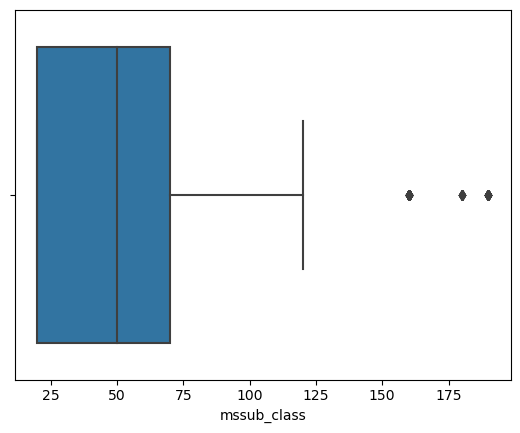

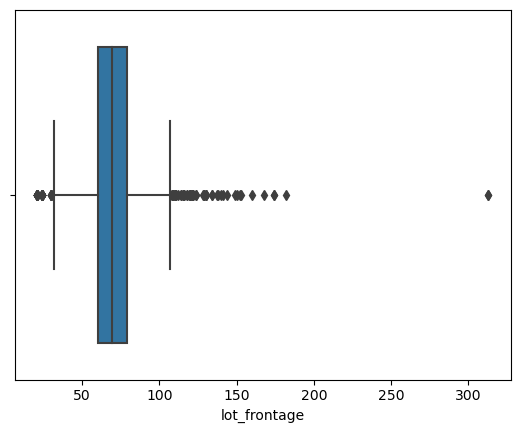

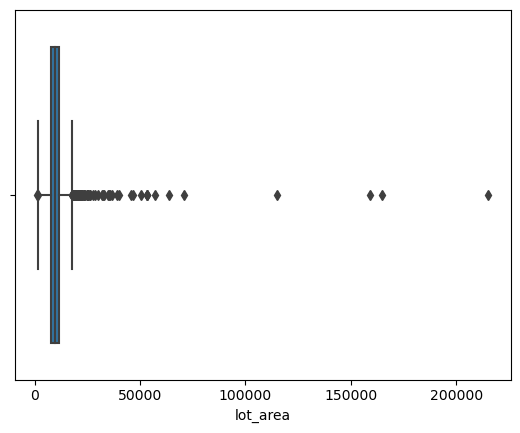

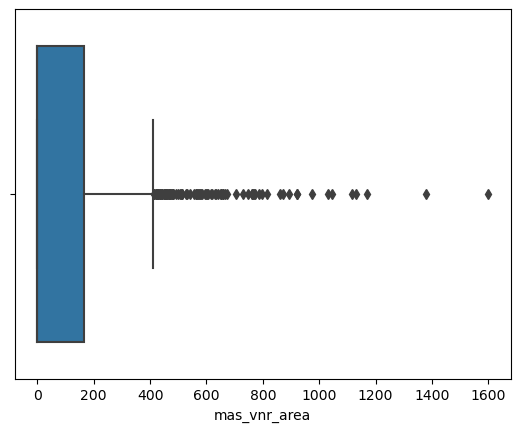

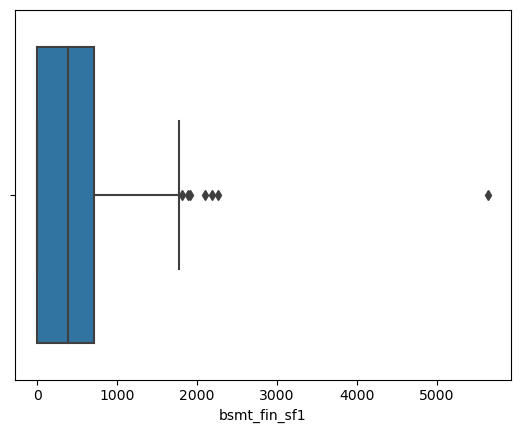

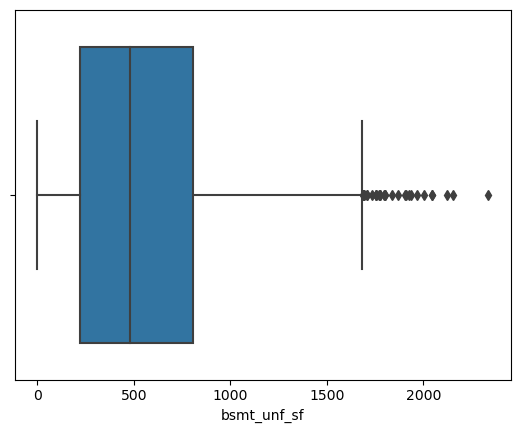

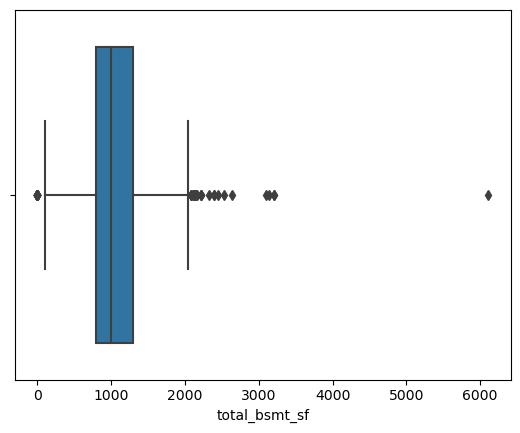

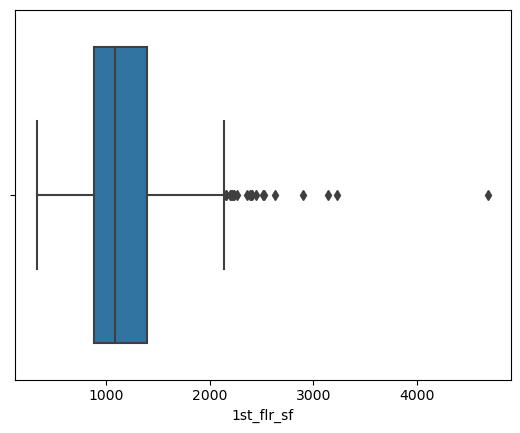

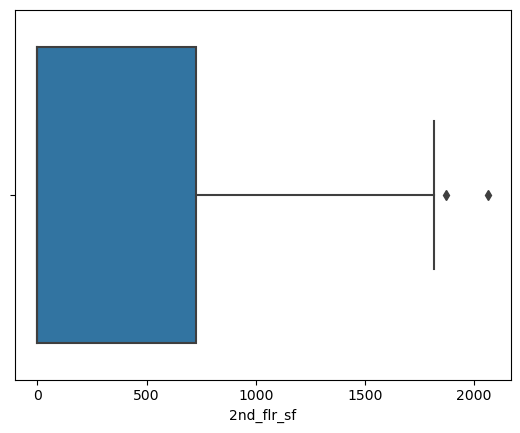

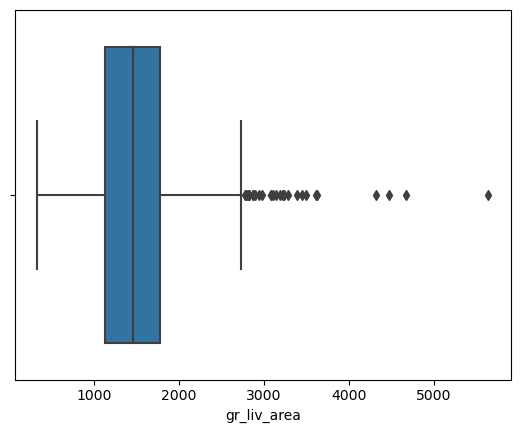

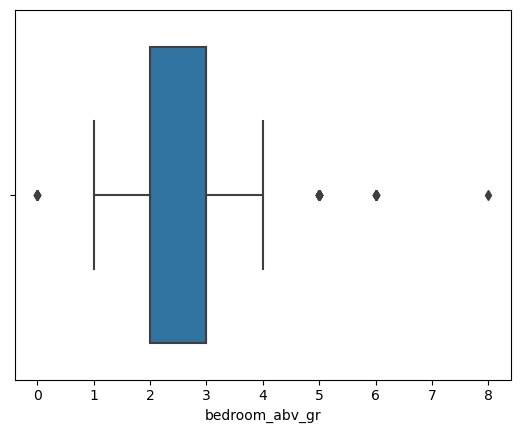

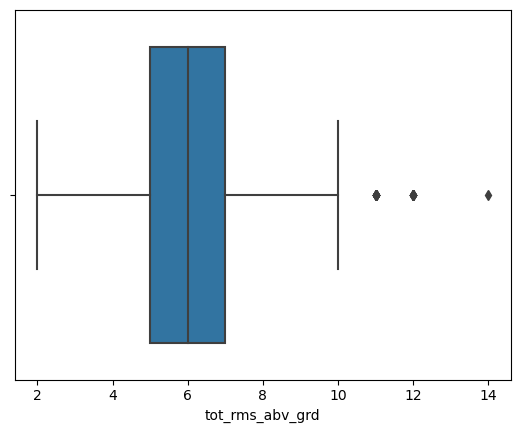

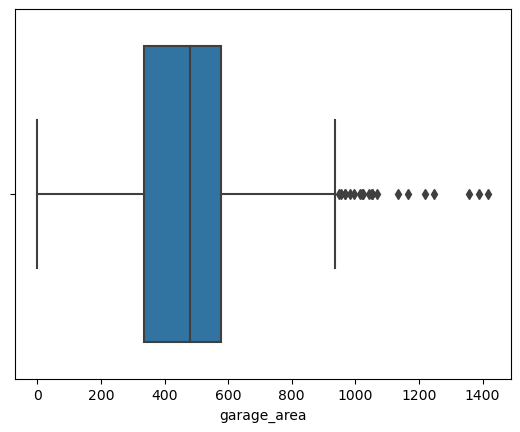

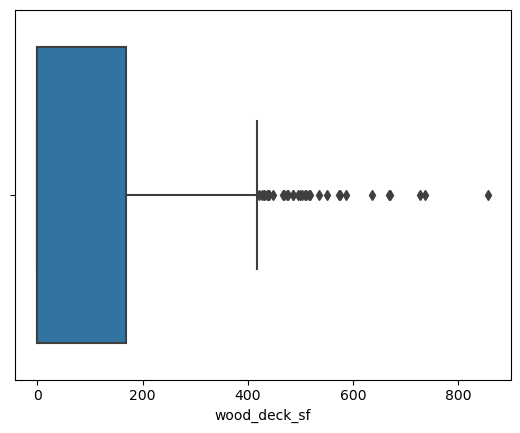

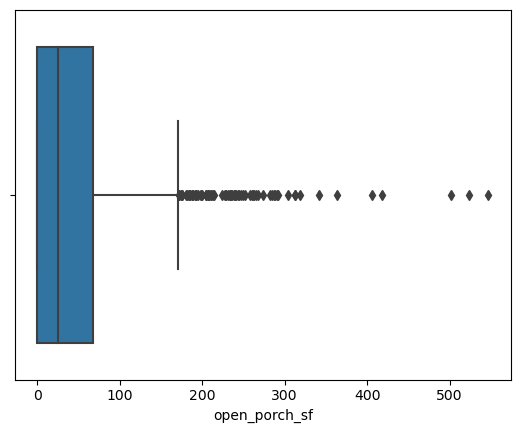

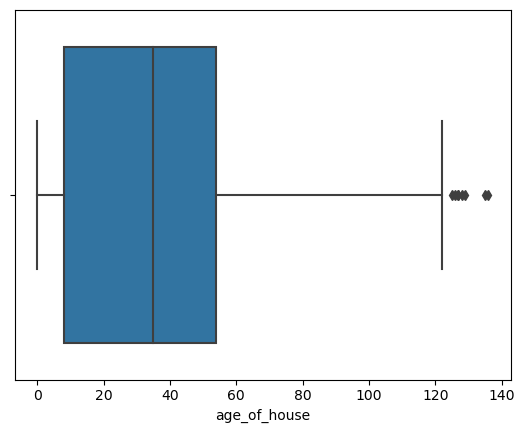

In [475]:
for i in num_var:
    sns.boxplot(x=housing_data[i])
    plt.show()

In [476]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    print("lower bound :" , lwr_bound)
    upr_bound = q3+(1.5*IQR)
    print("upper bound :" , upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

In [477]:
for data in num_var:
    print("Handling outliers for : "+ data)
    sample_outliers = detect_outliers_iqr(housing_data[data])
    print(sample_outliers)
    median = np.median(housing_data[data])
    print("Median value for data :", data, median)
    for i in sample_outliers:
        housing_data[data] = np.where(housing_data[data]==i, median, housing_data[data])
    print("Handling outliers Done for  : "+ data)
    print("\n")

Handling outliers for : mssub_class
lower bound : -55.0
upper bound : 145.0
[160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
Median value for data : mssub_class 50.0
Handling outliers Done for  : mssub_class


Handling outliers for : lot_frontage
lower bound : 31.5
upper bound : 107.5
[21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 

# EDA

# Univariate Analysis

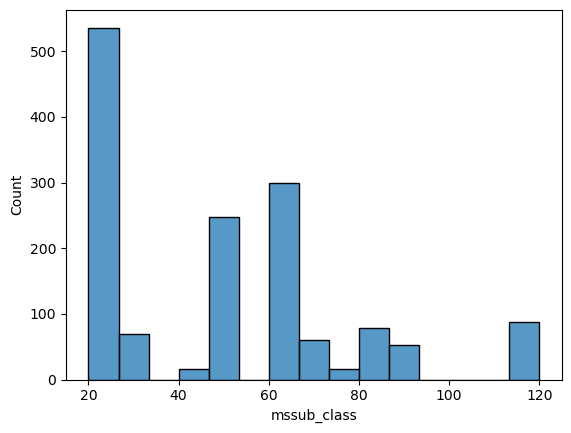

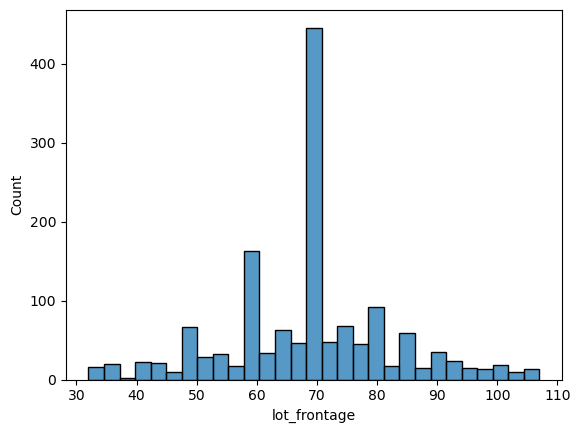

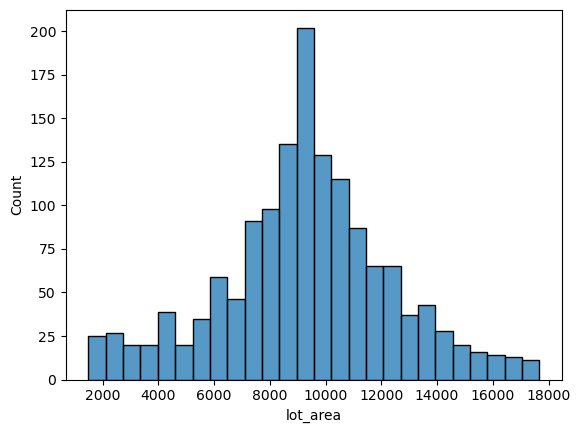

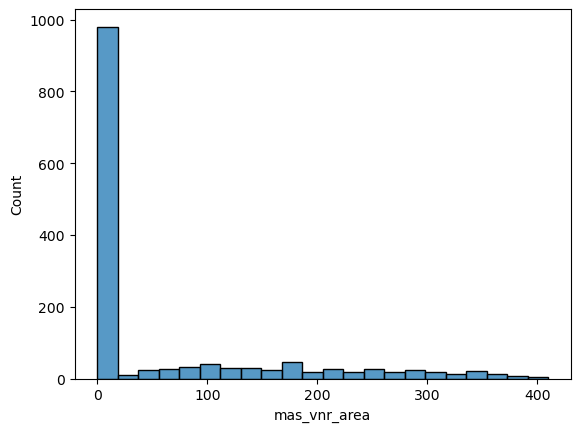

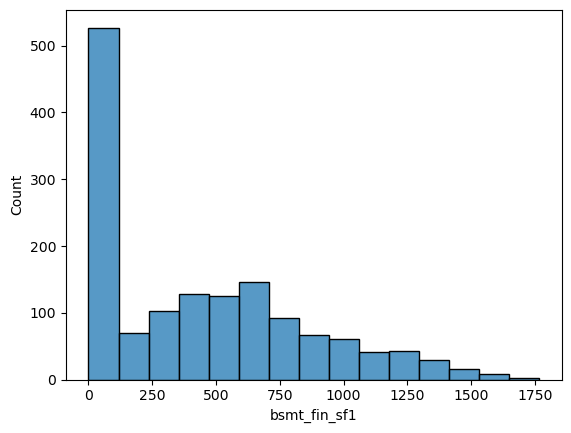

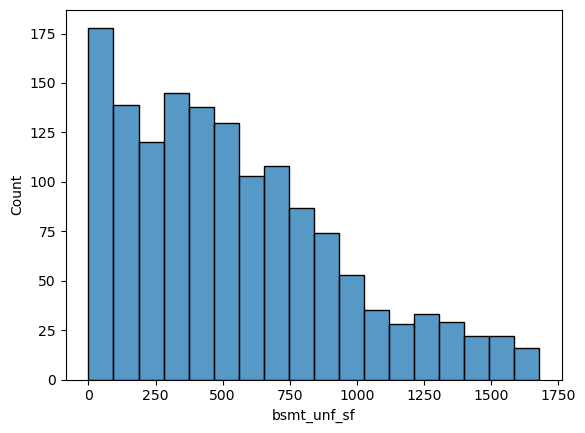

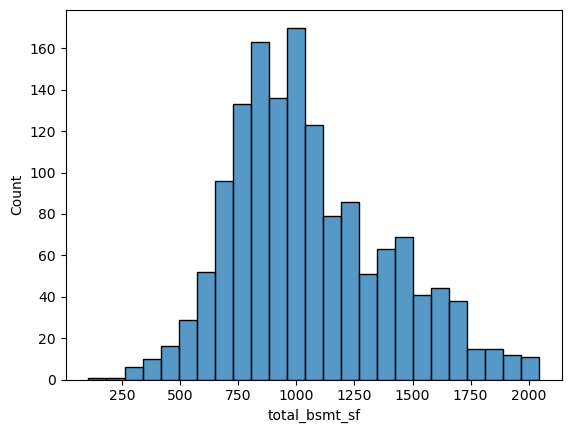

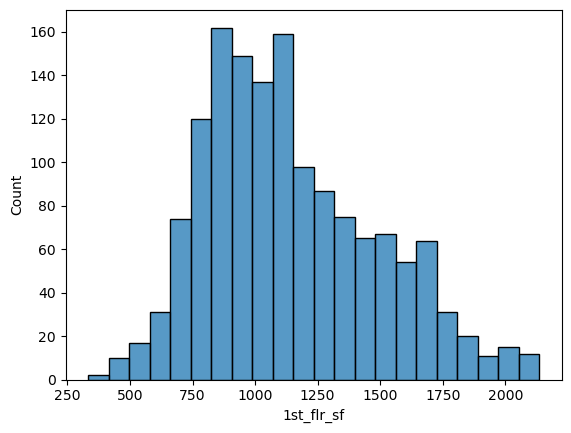

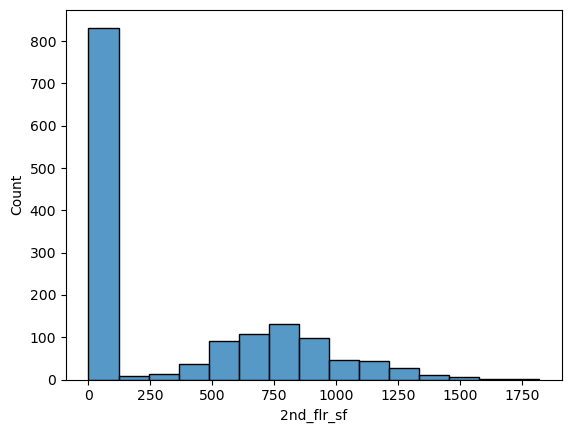

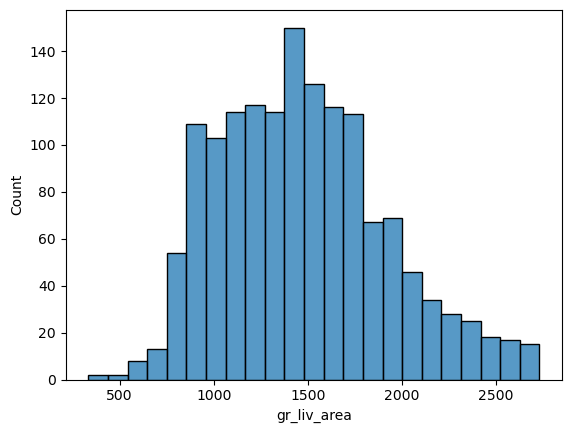

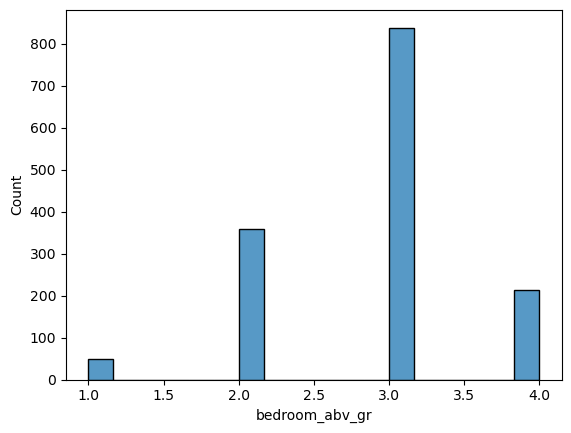

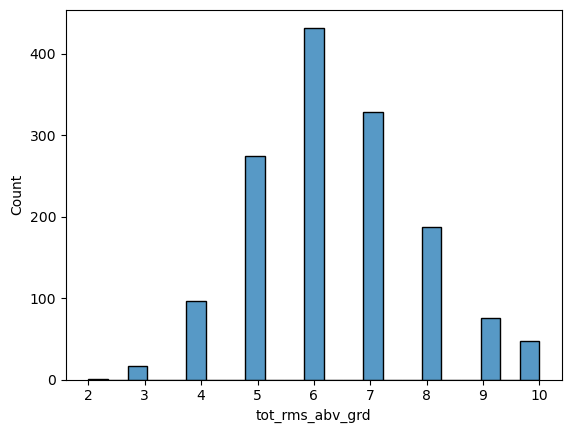

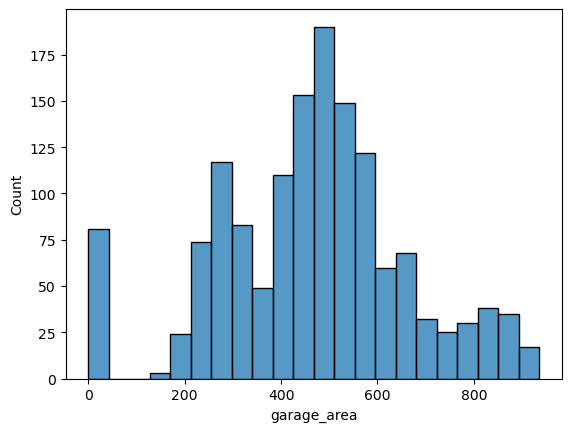

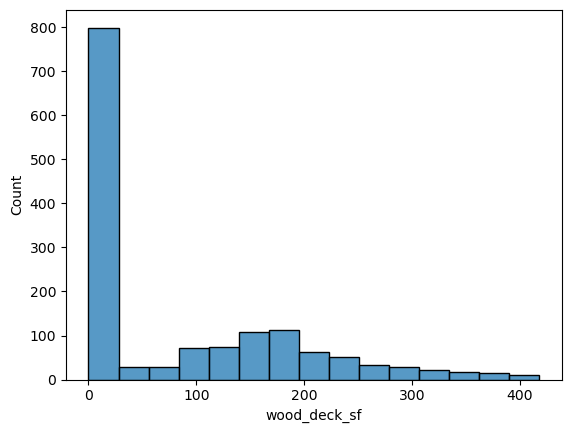

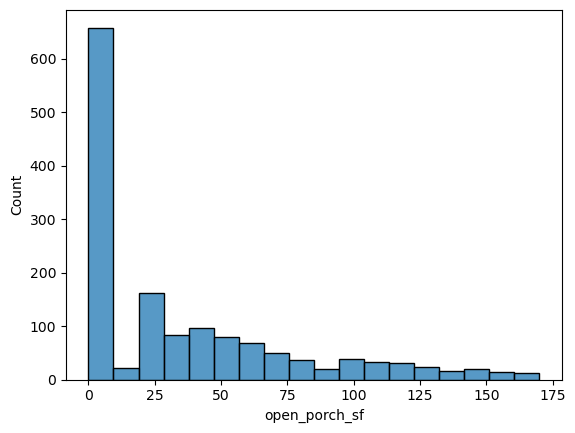

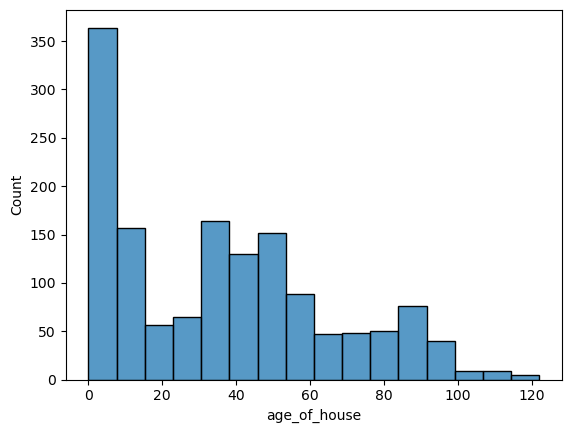

In [478]:
for i in num_var:
    sns.histplot(x=housing_data[i])
    plt.show()

# Bivariate Analysis

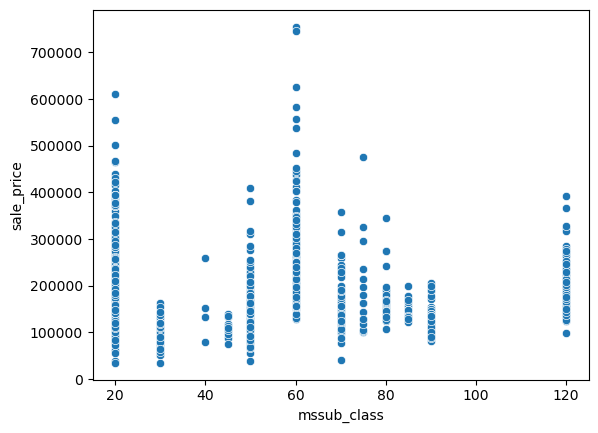

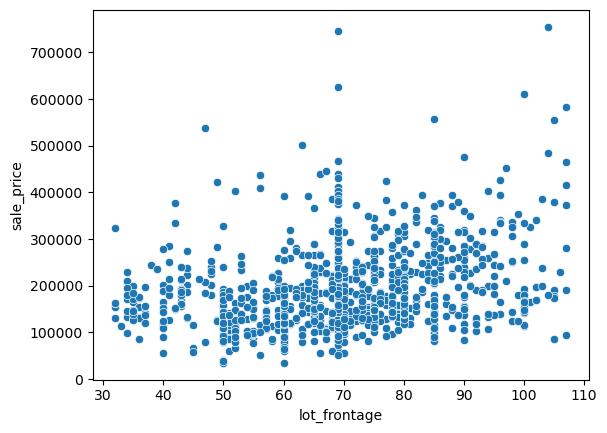

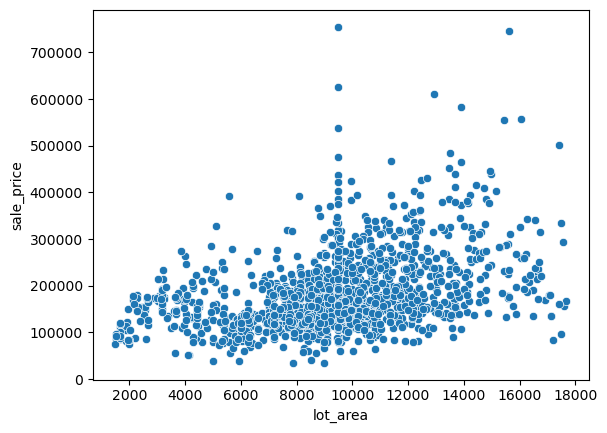

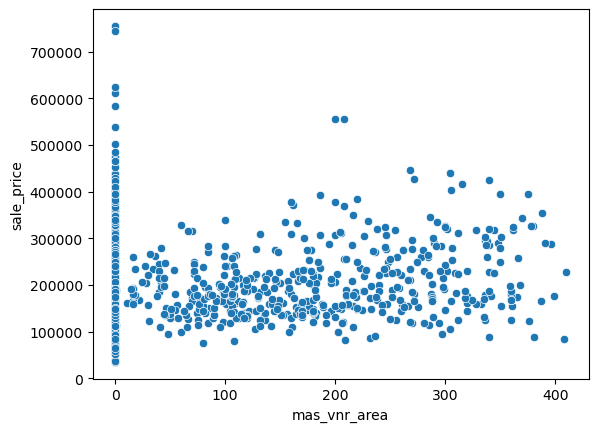

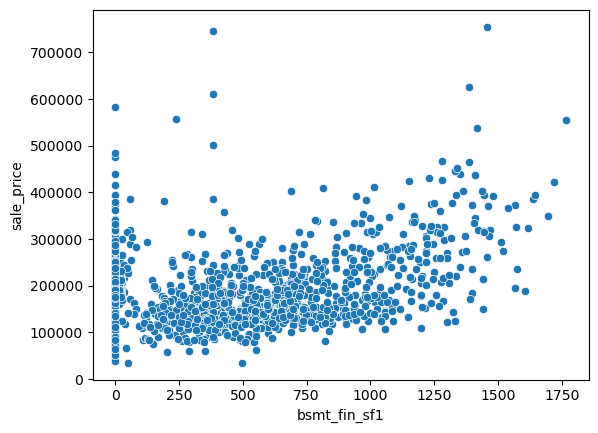

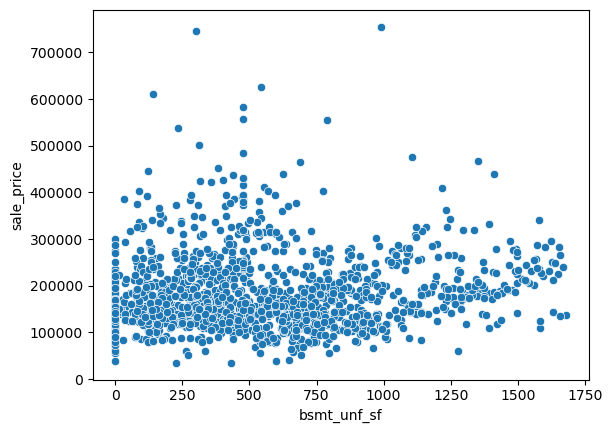

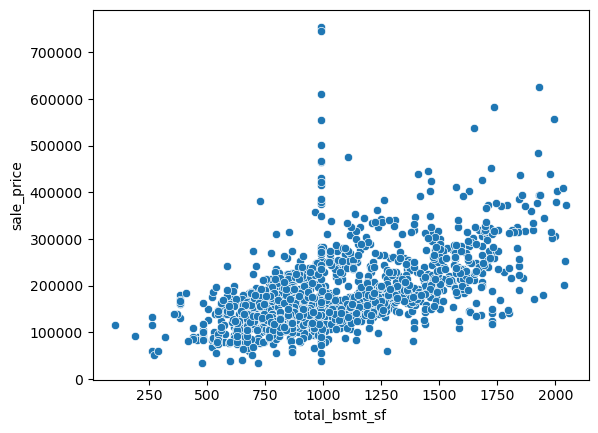

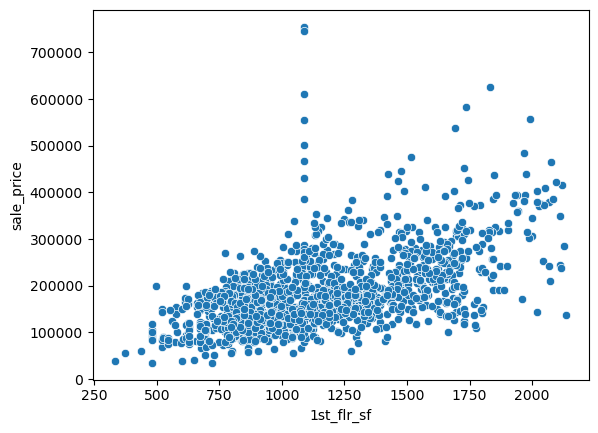

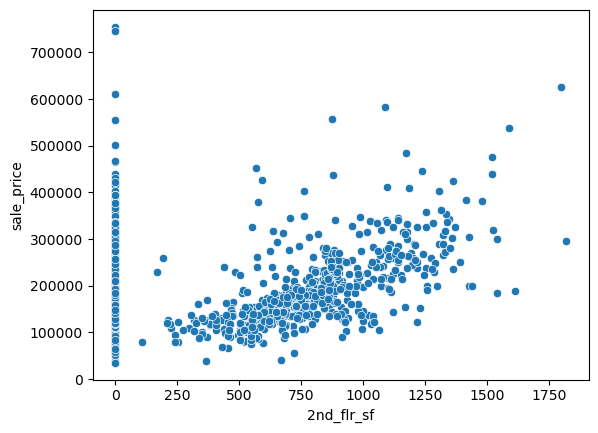

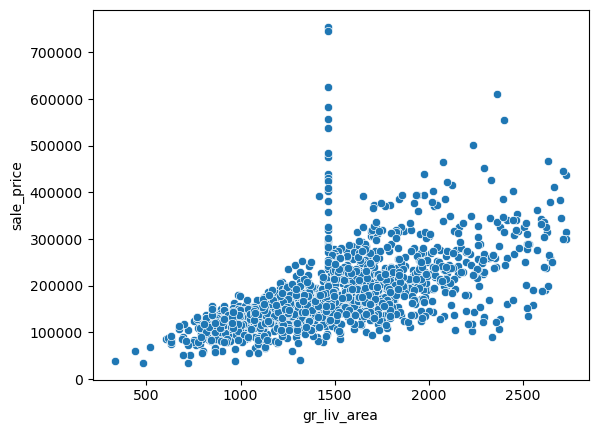

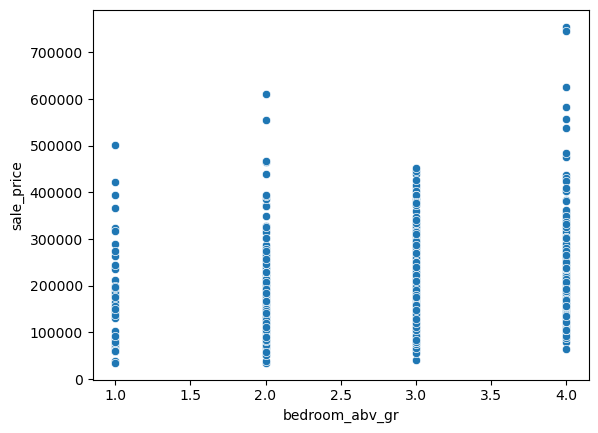

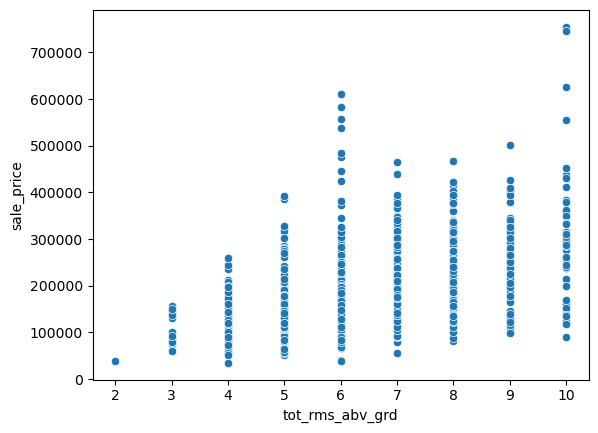

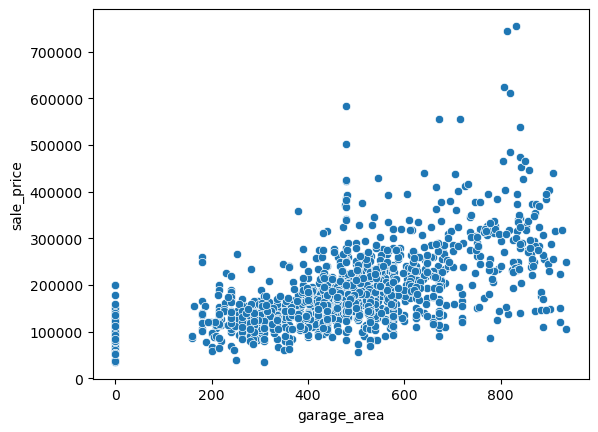

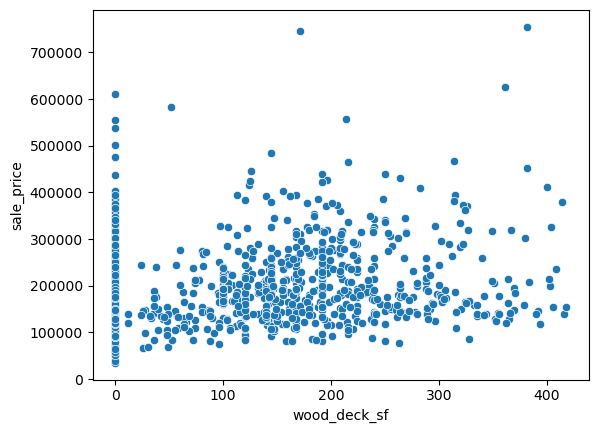

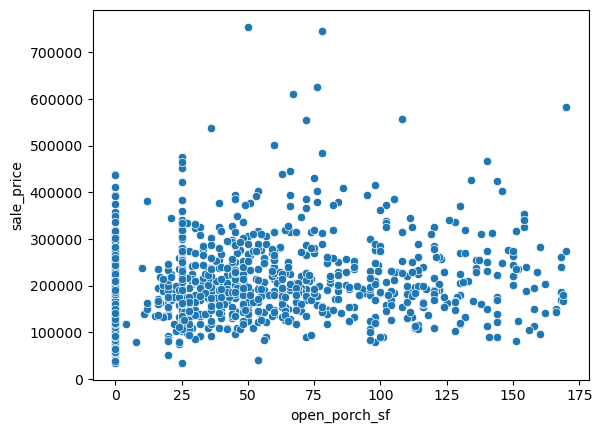

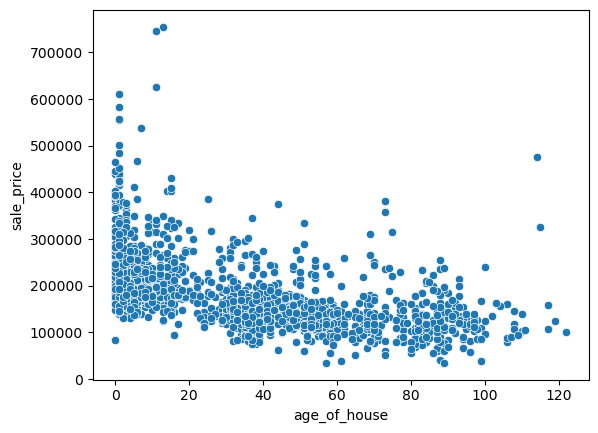

In [479]:
for i in num_var:
    sns.scatterplot(x=housing_data[i],y=housing_data["sale_price"])
    plt.show()

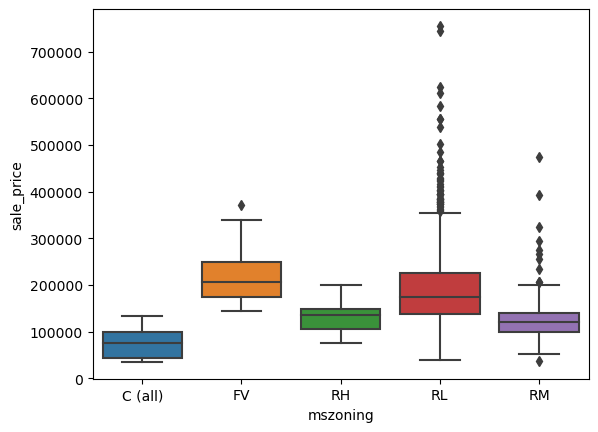

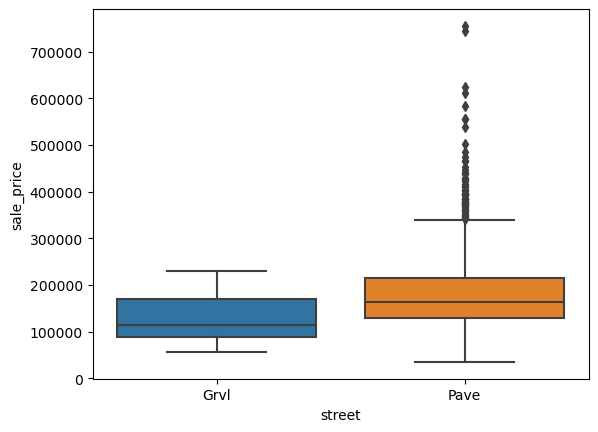

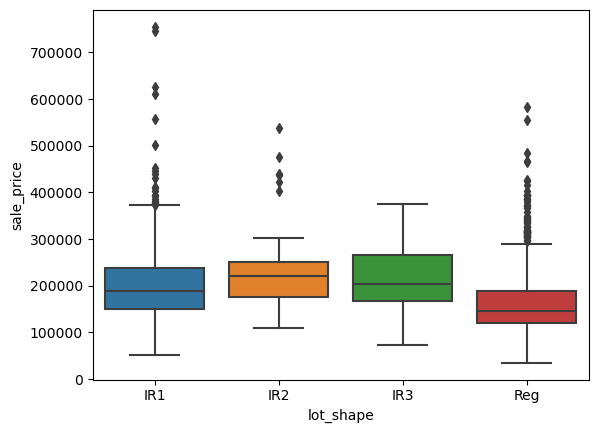

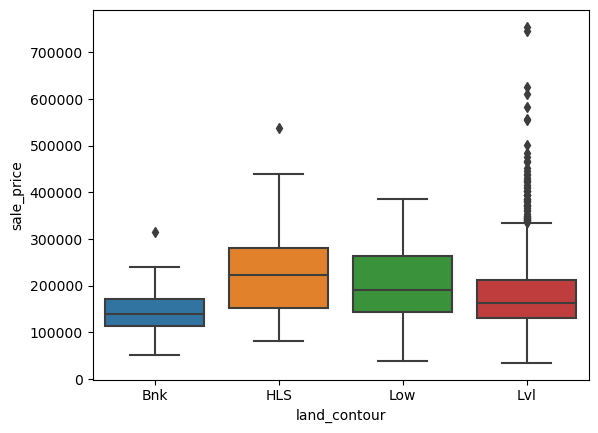

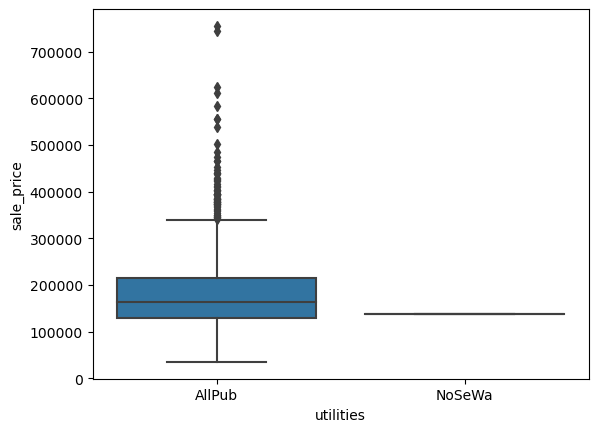

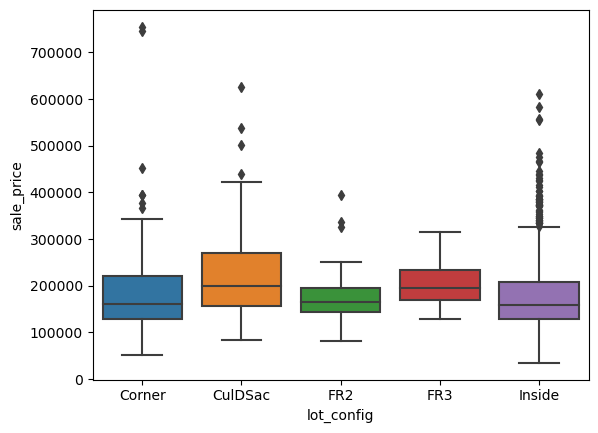

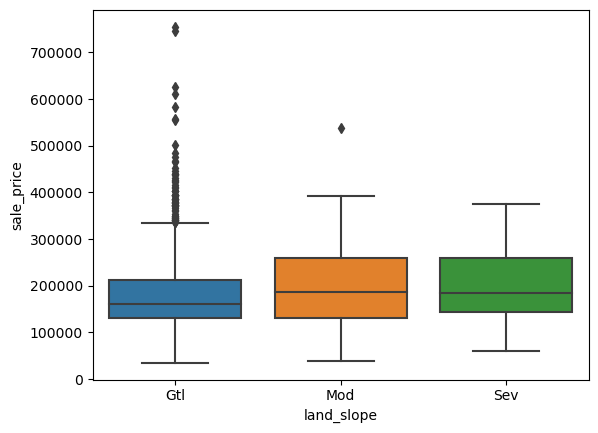

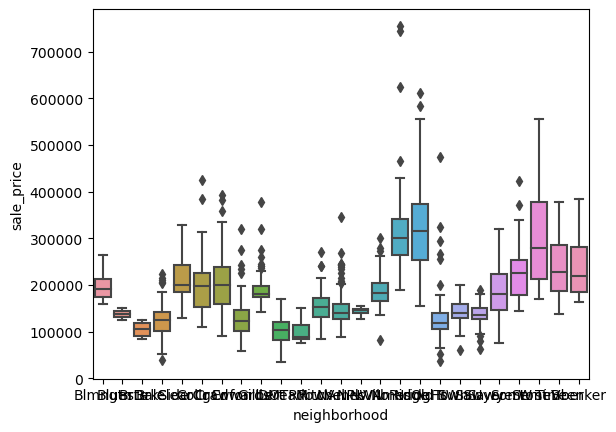

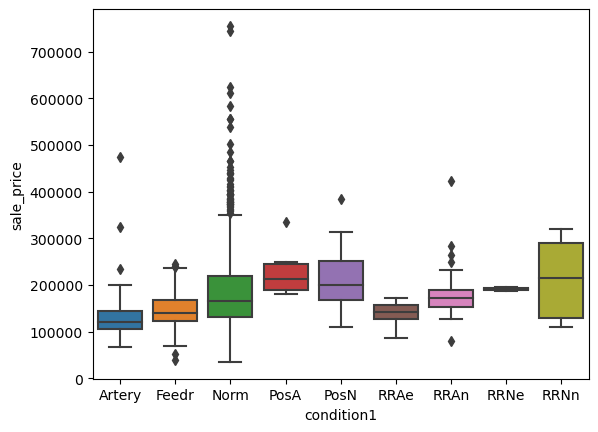

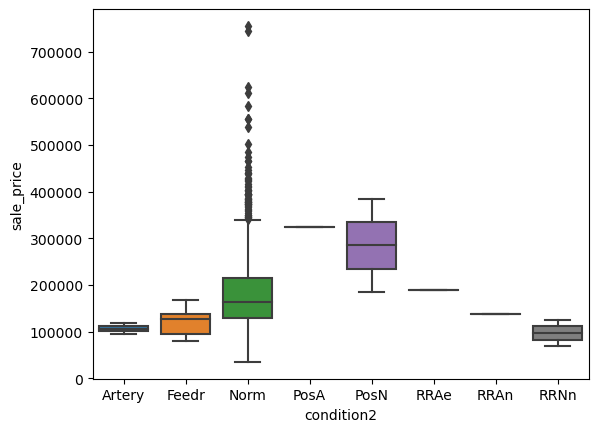

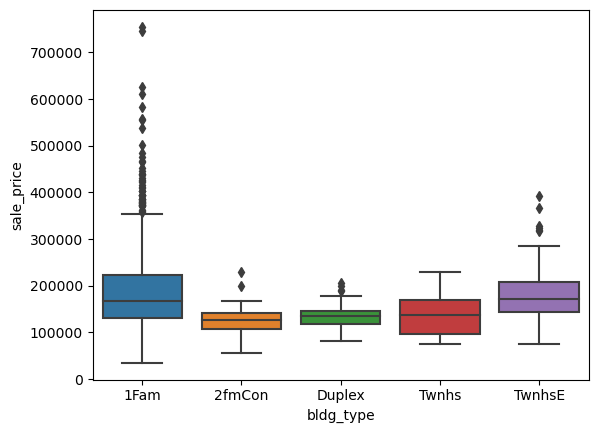

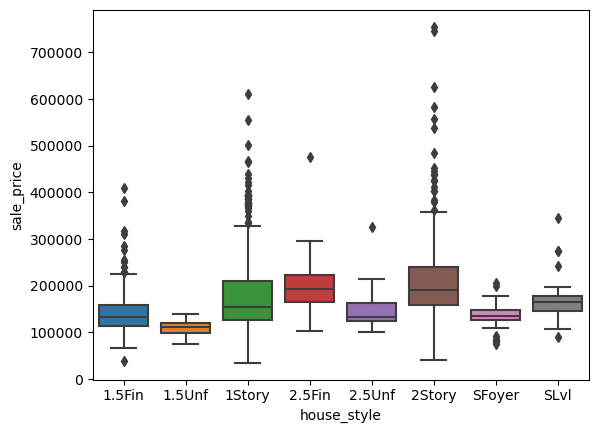

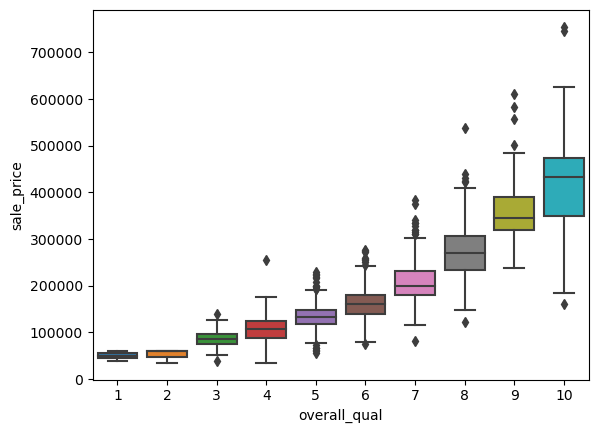

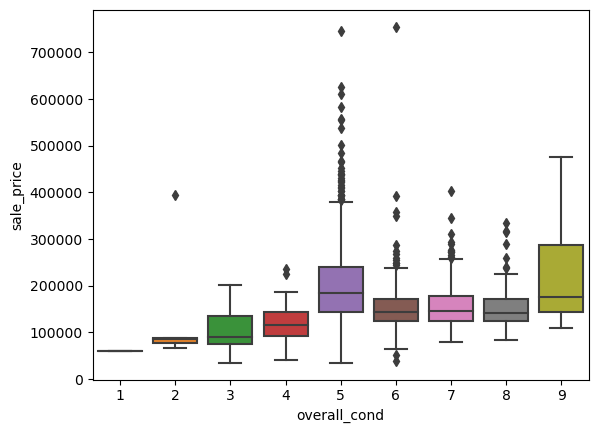

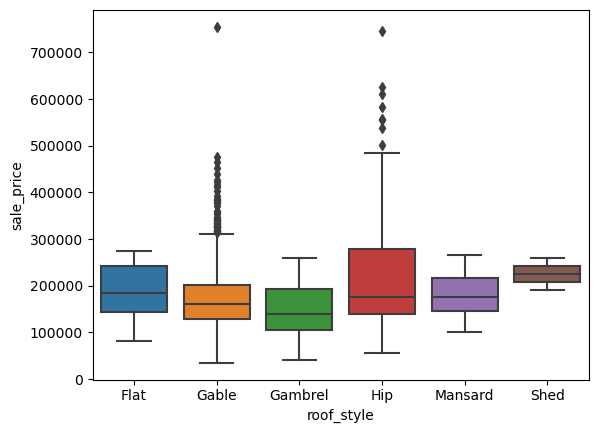

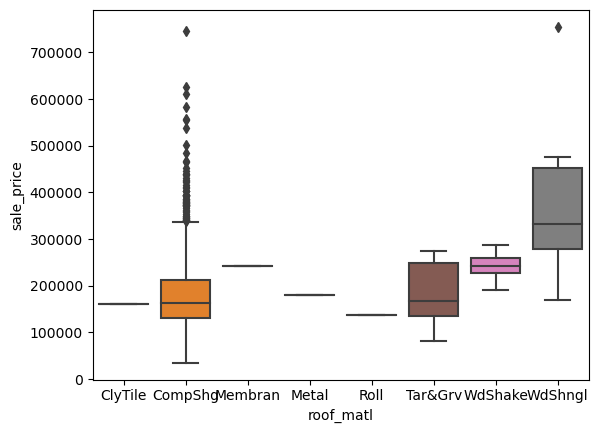

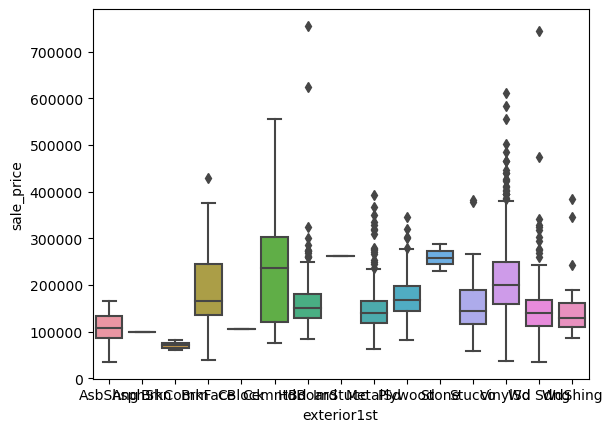

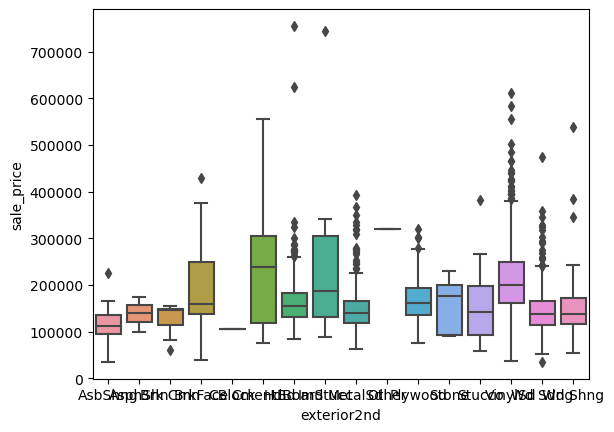

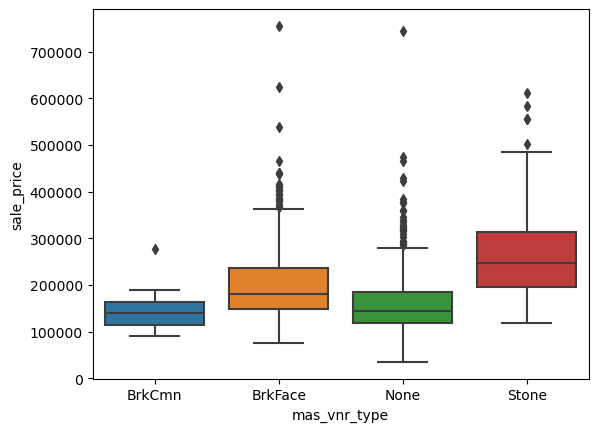

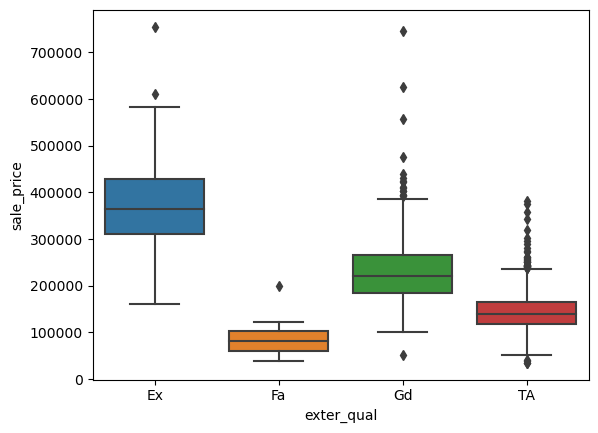

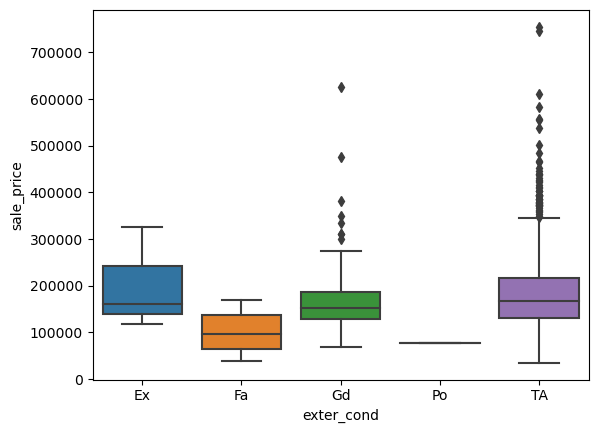

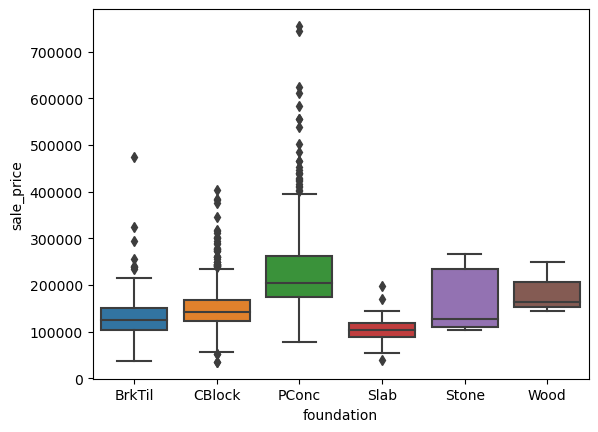

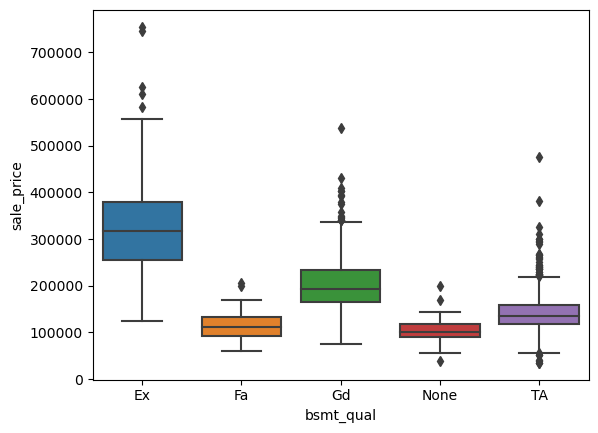

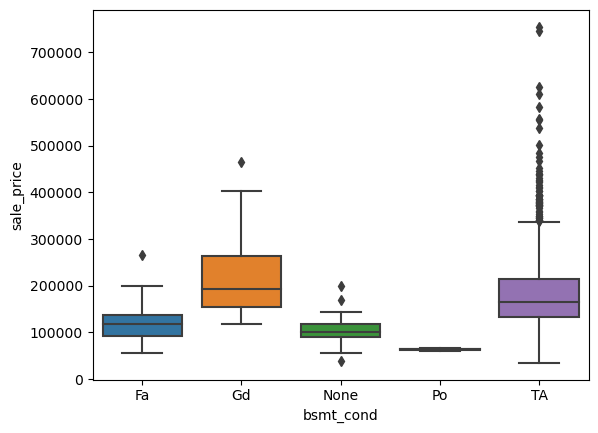

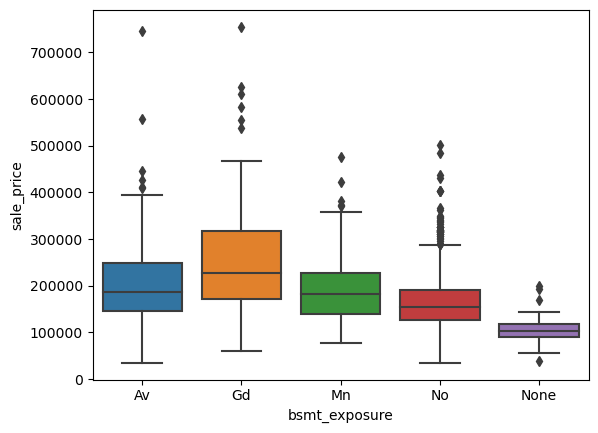

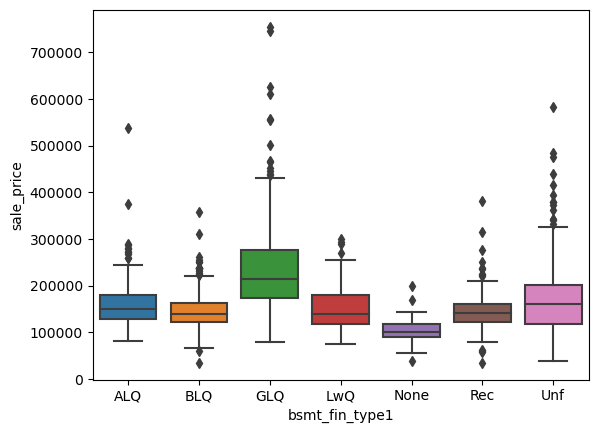

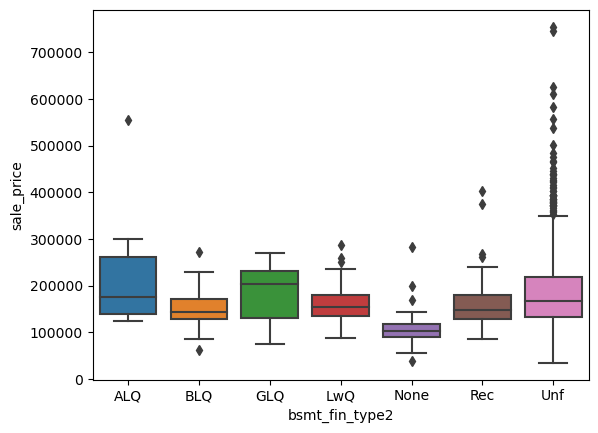

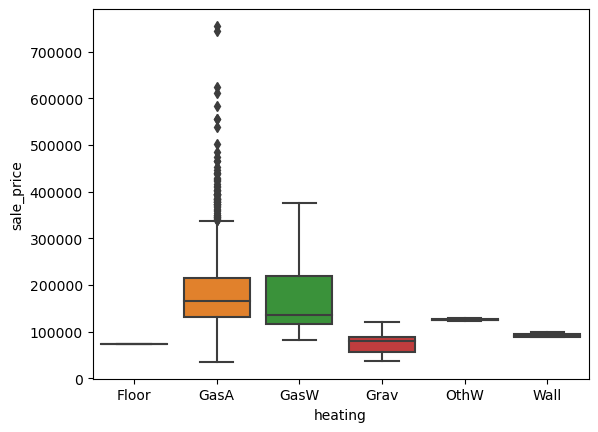

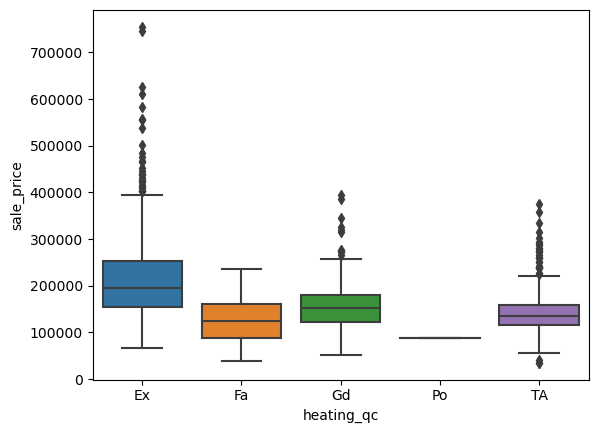

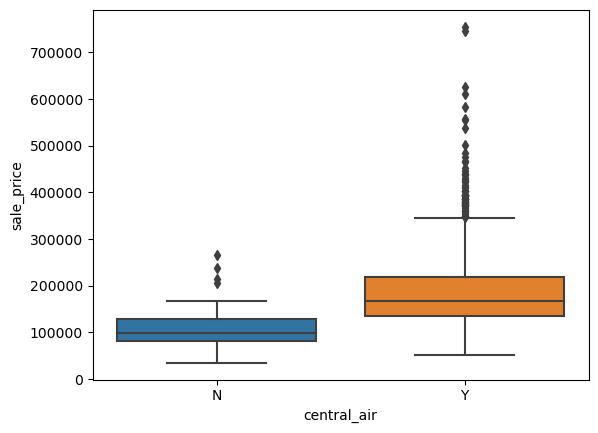

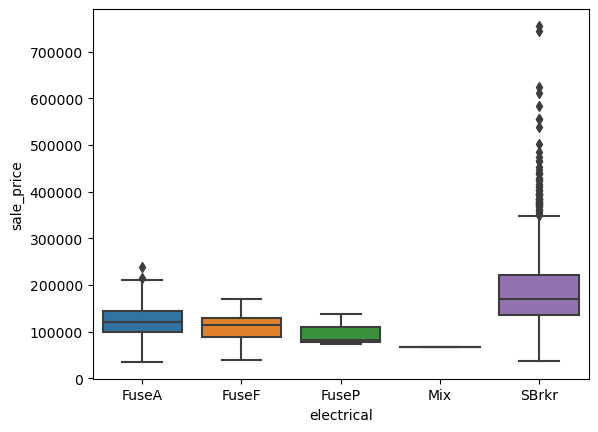

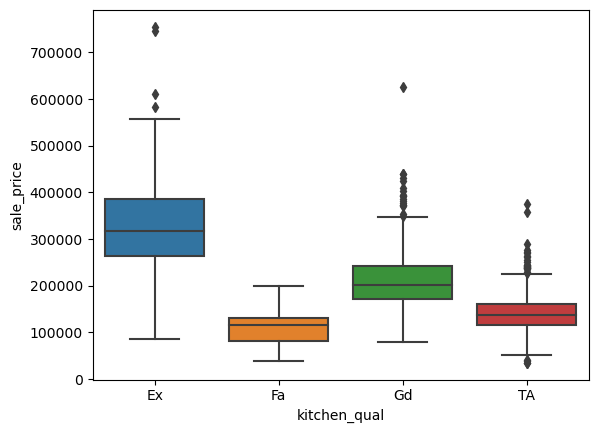

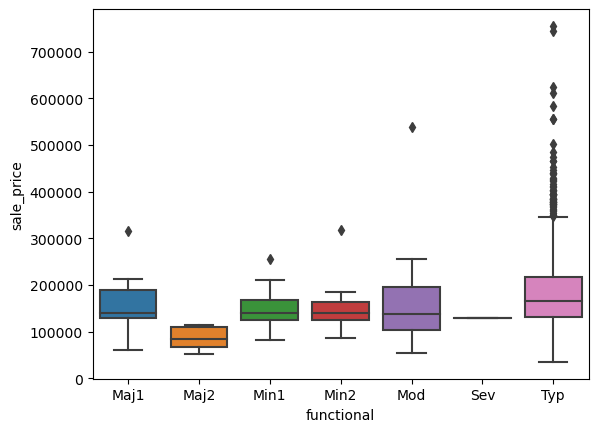

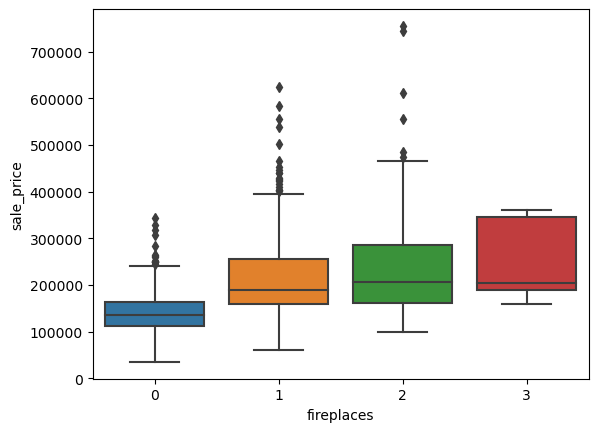

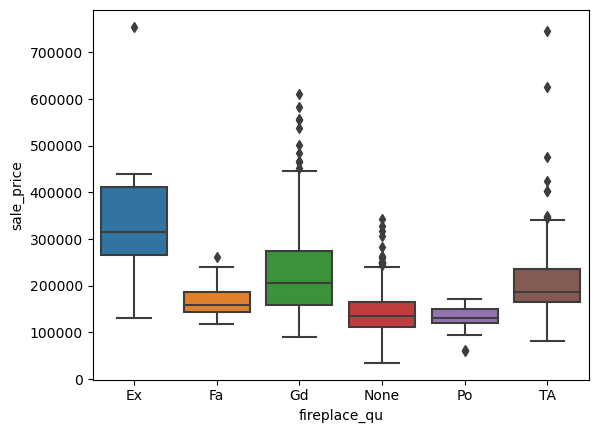

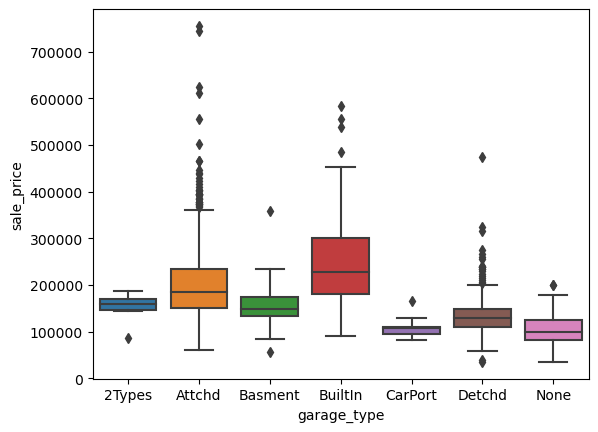

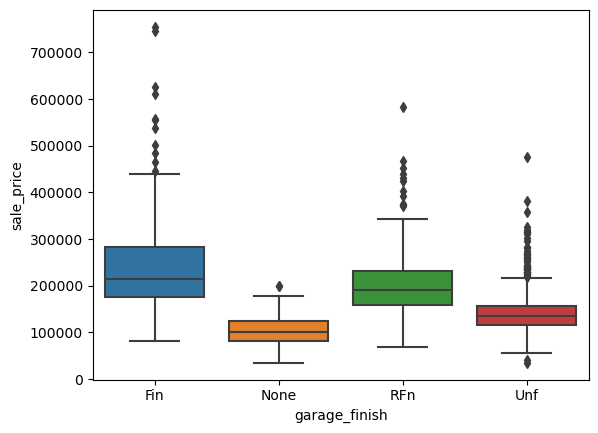

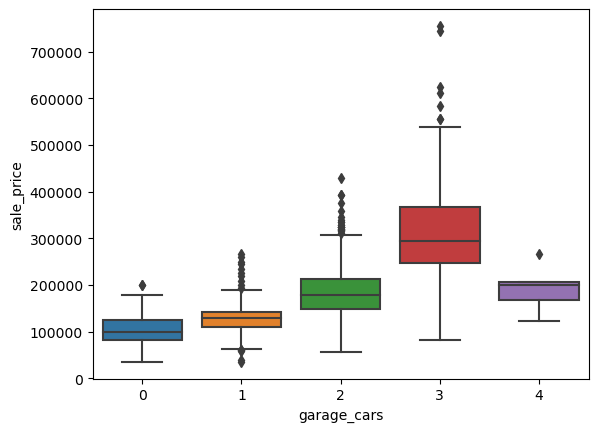

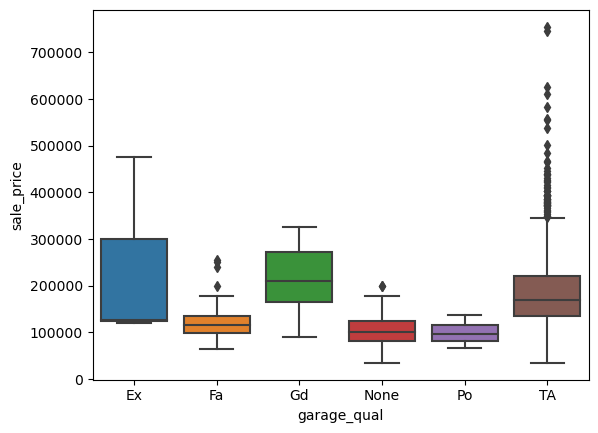

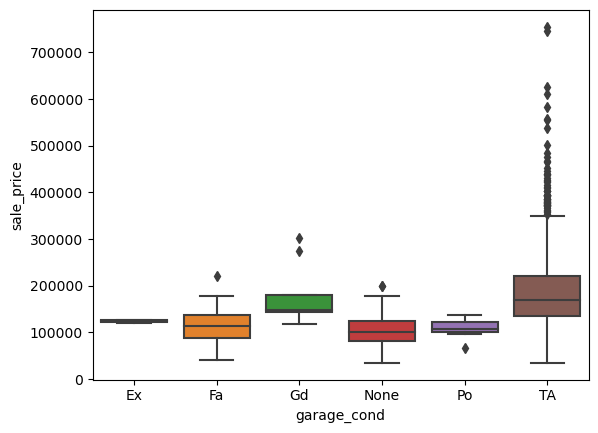

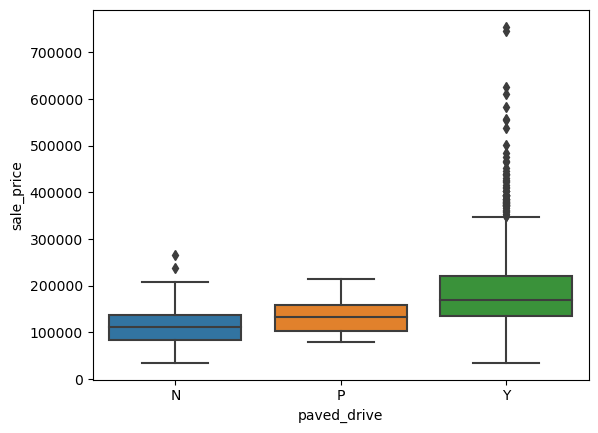

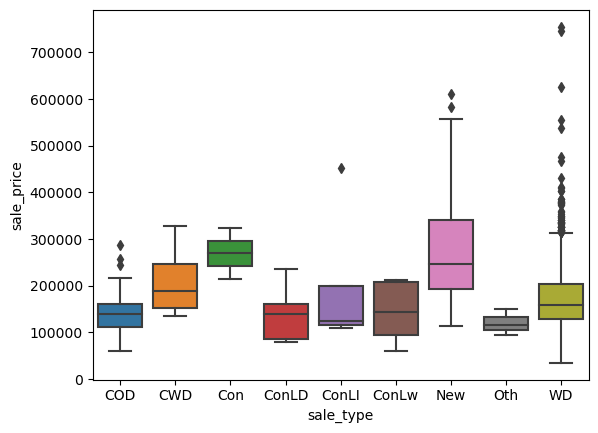

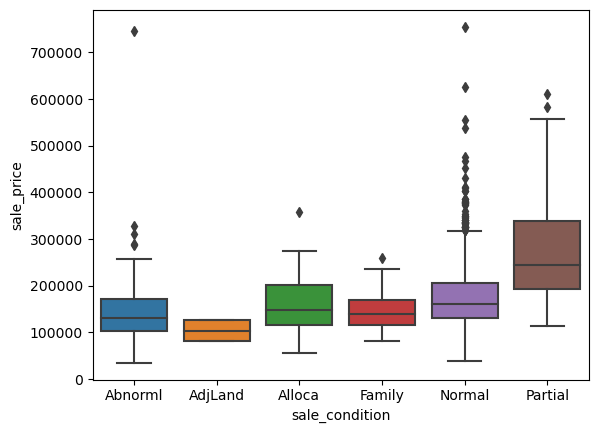

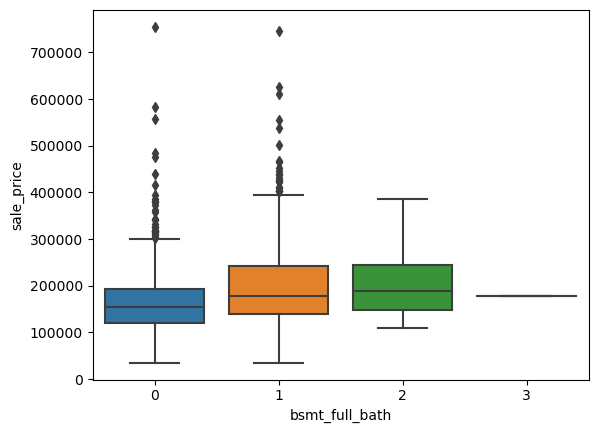

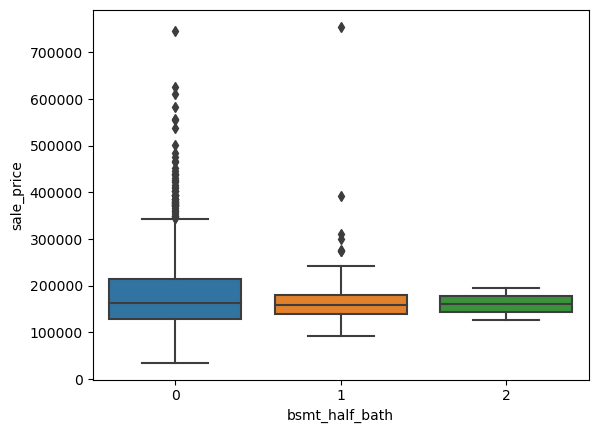

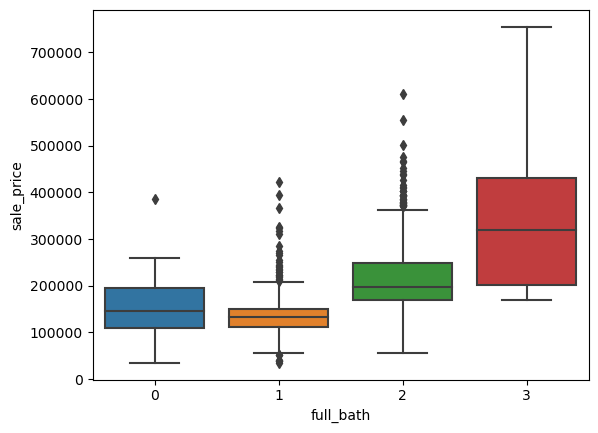

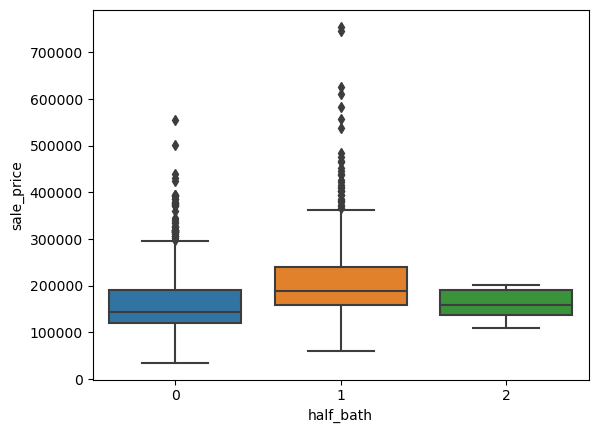

In [480]:
for i in cat_vars:
    sns.boxplot(x=housing_data[i],y=housing_data["sale_price"])
    plt.show()

# Multivariate Analysis

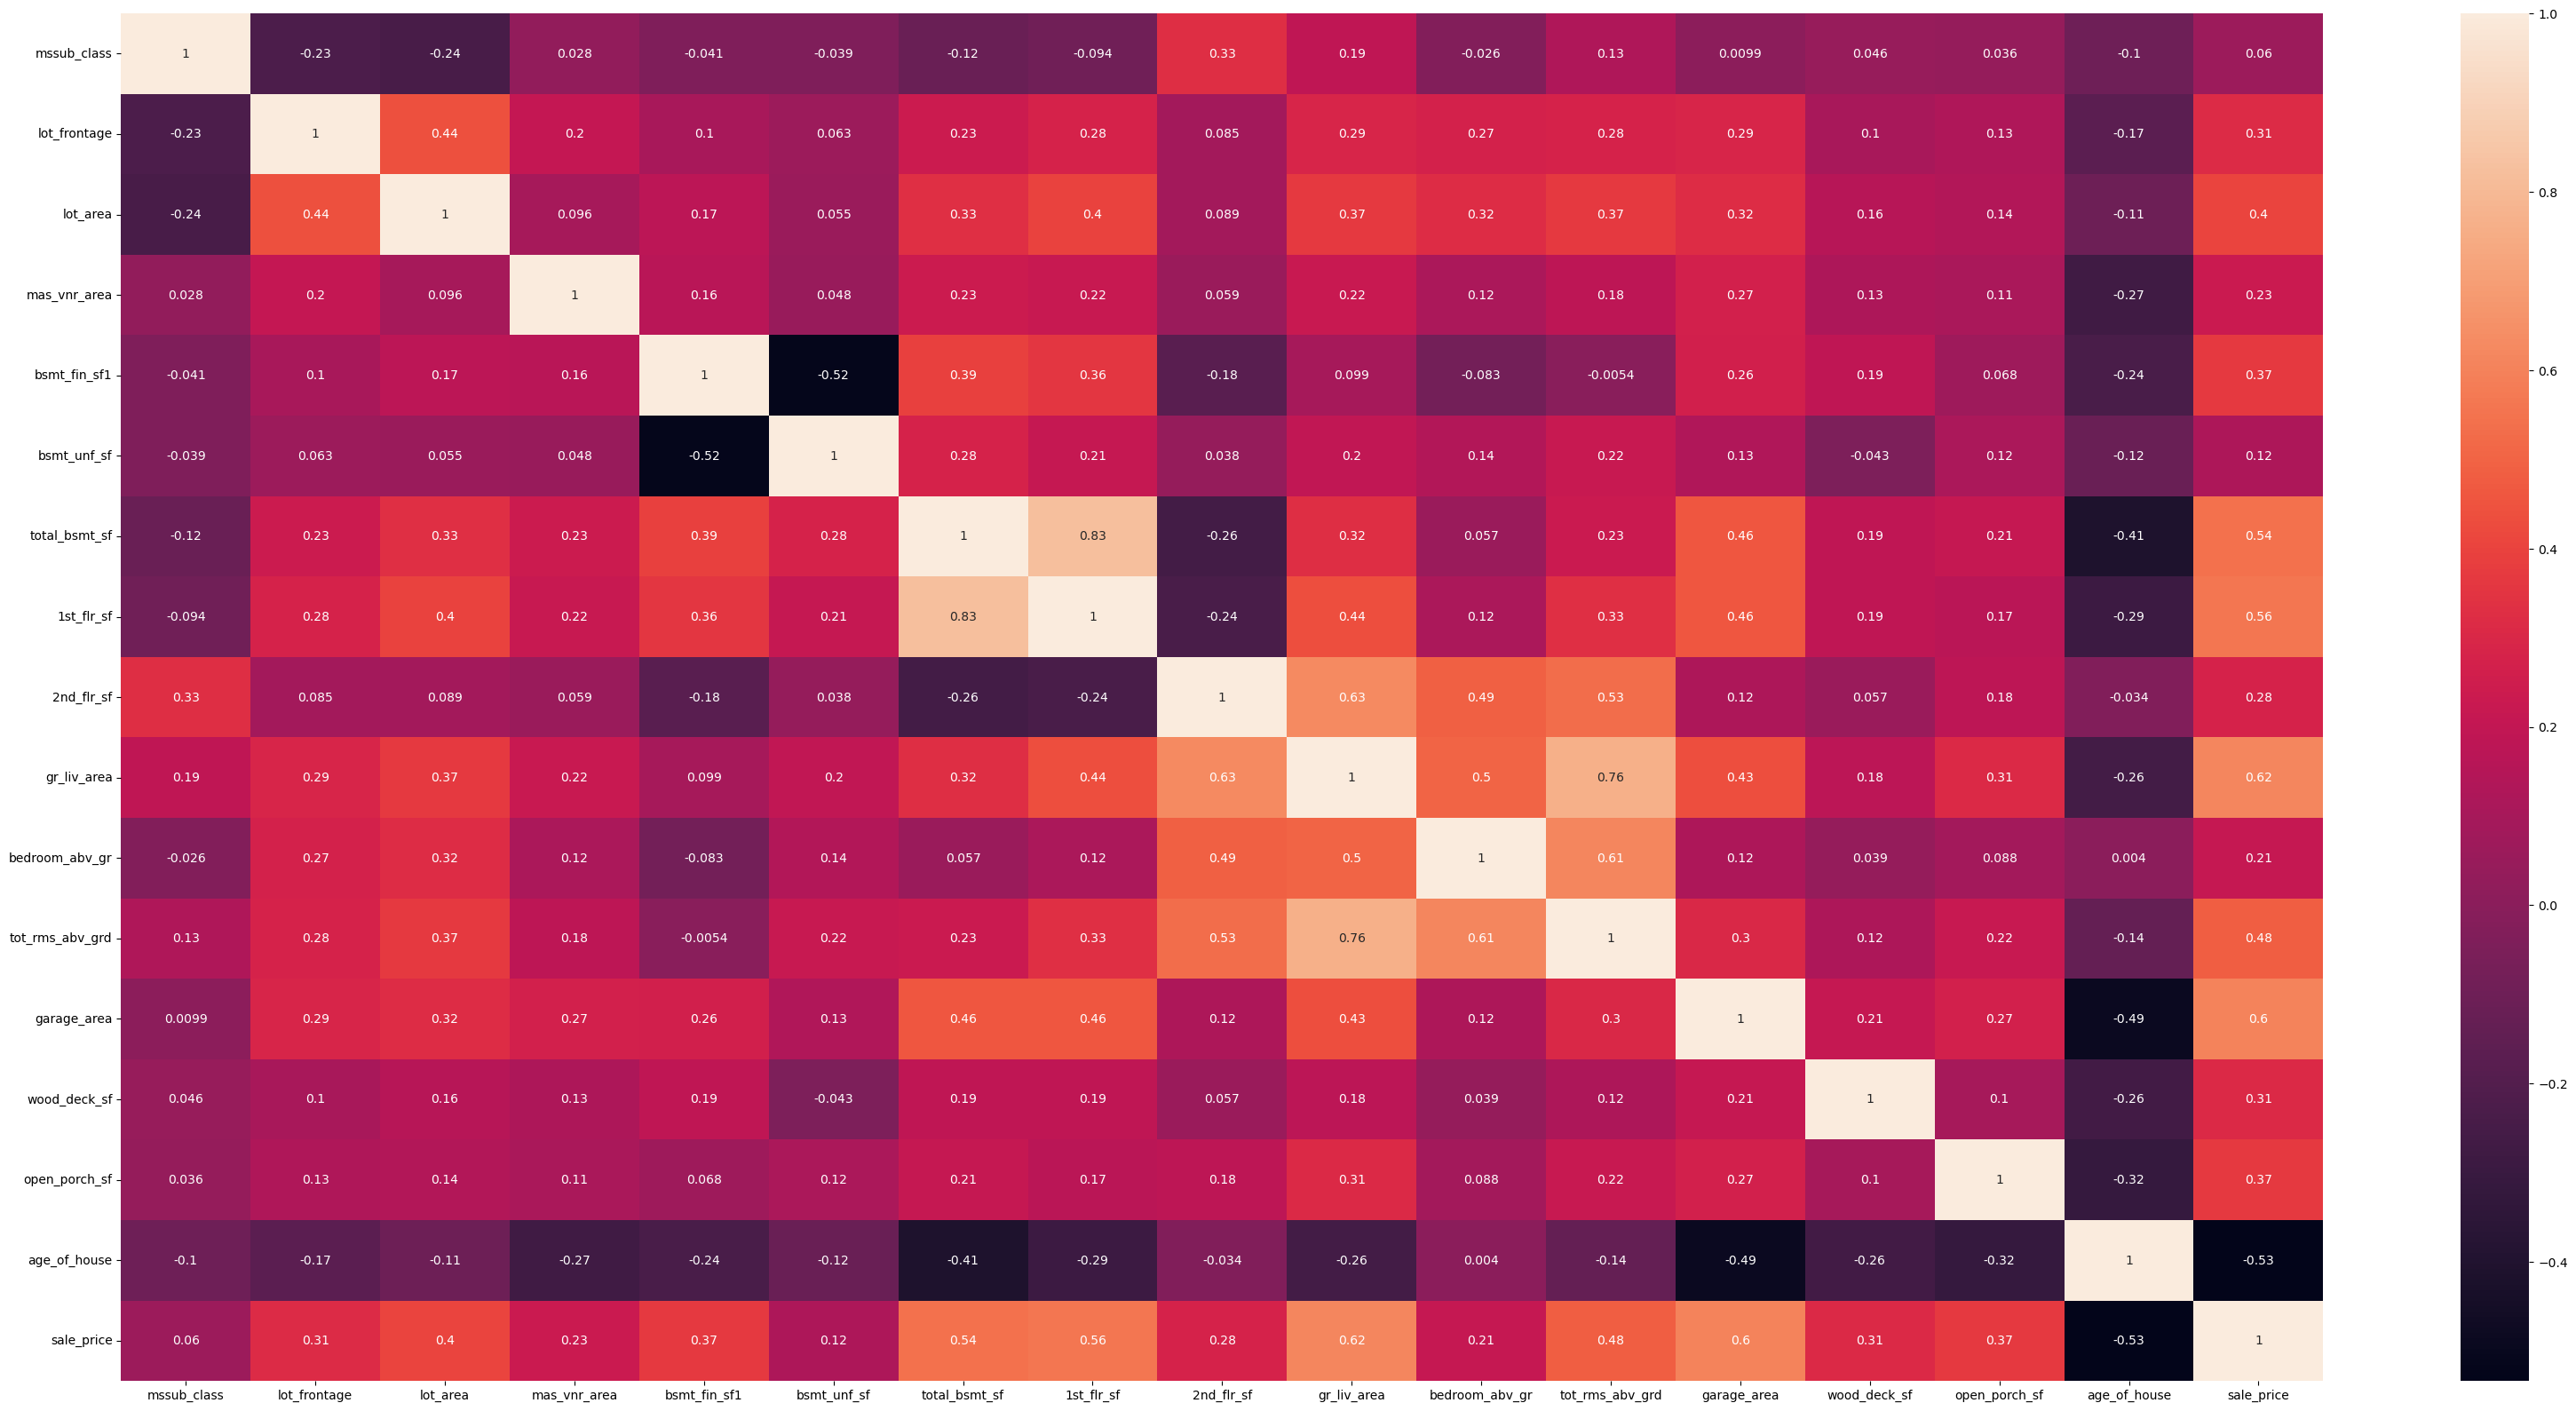

In [481]:
corrmat = housing_data[num_var+["sale_price"]].corr();
plt.figure(figsize=(40,20))
sns.heatmap(corrmat ,annot=True)
plt.show()

# Pre-processing Steps

In [482]:
## Dummy Variable creation

In [483]:
# for categorical columns creating dummies and dropping the first column

cat_var_dummies = pd.get_dummies(housing_data[cat_vars], drop_first = True)

In [484]:
cat_var_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 244 entries, mszoning_FV to half_bath_2
dtypes: uint8(244)
memory usage: 348.0 KB


In [485]:
# merge the dummy variable created
housing_data = pd.concat([housing_data, cat_var_dummies], axis = 1)

In [486]:
# Then dropping the exisiting categorical columns
housing_data = housing_data.drop(cat_vars, axis=1)

In [487]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 261 entries, mssub_class to half_bath_2
dtypes: float32(2), float64(14), int32(1), uint8(244)
memory usage: 524.8 KB


In [488]:
# Checking the skewness of target variable and validate the normal distribution

<Axes: xlabel='sale_price', ylabel='Density'>

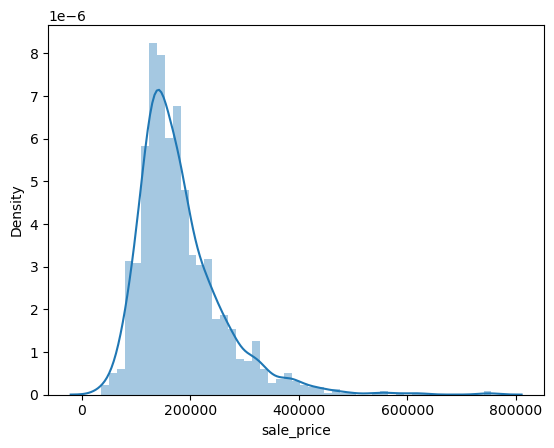

In [489]:
sns.distplot(housing_data["sale_price"])

<Axes: xlabel='sale_price', ylabel='Density'>

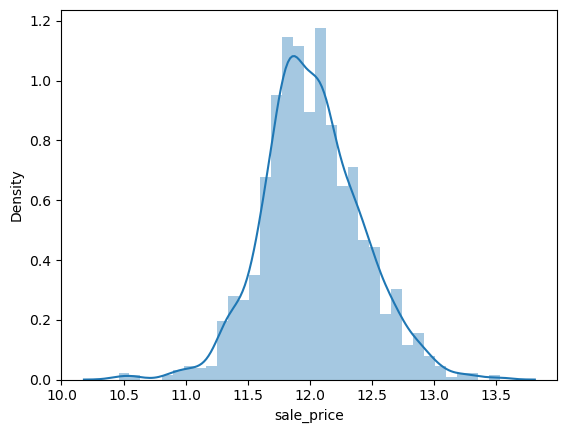

In [490]:
sns.distplot(np.log(housing_data["sale_price"]))

In [491]:
print("Skewness: %f" % housing_data['sale_price'].skew())

Skewness: 1.882876


In [492]:
print("Skewness: %f" % np.log(housing_data["sale_price"]).skew())

Skewness: 0.121335


Based on the graph and skewness value , 
the target SalePrice, is very skewed and a logarithm transformation would make it more normally distributed 
and to boost performance.

In [493]:
housing_data["sale_price"] = np.log(housing_data["sale_price"])

## Splitting the Data into Training and Testing Sets

In [494]:
X=housing_data.drop(["sale_price"],axis=1)
y=housing_data["sale_price"]

In [495]:
X.columns = X.columns.astype(str)

In [496]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [497]:
X_train.shape

(1022, 260)

## Rescaling the Features 

In [498]:
# Scaling using Min-Max

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()

X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head(10)

,mssub_class,lot_frontage,lot_area,mas_vnr_area,bsmt_fin_sf1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,...,bsmt_full_bath_1,bsmt_full_bath_2,bsmt_full_bath_3,bsmt_half_bath_1,bsmt_half_bath_2,full_bath_1,full_bath_2,full_bath_3,half_bath_1,half_bath_2
210,0.1,0.466667,0.256246,0.000000,0.264856,0.235714,0.391036,0.278912,0.000000,0.185864,...,1,0,0,0,0,1,0,0,0,0
318,0.4,0.773333,0.523893,0.624390,0.558574,0.214286,0.639876,0.566893,0.700770,0.963351,...,1,0,0,0,0,0,1,0,1,0
239,0.3,0.266667,0.451685,0.000000,0.053198,0.381548,0.324575,0.241497,0.378988,0.457679,...,0,0,0,0,0,1,0,0,1,0
986,0.3,0.360000,0.237929,0.000000,0.000000,0.288690,0.195775,0.356576,0.348735,0.522251,...,0,0,0,0,0,1,0,0,0,0
1416,0.3,0.373333,0.613607,0.000000,0.000000,0.462500,0.346213,0.495465,0.574257,0.808028,...,0,0,0,0,0,0,1,0,0,0
390,0.3,0.240000,0.430752,0.000000,0.136389,0.136310,0.389490,0.333900,0.223322,0.405323,...,1,0,0,0,0,1,0,0,0,0
1005,0.6,0.440000,0.429506,0.536585,0.336729,0.232143,0.453375,0.347506,0.000000,0.238656,...,0,0,0,0,0,0,1,0,0,0
568,0.3,0.626667,0.675098,0.000000,0.815507,0.032738,0.716641,0.637188,0.349835,0.739092,...,1,0,0,0,0,1,0,0,1,0
342,0.7,0.493333,0.439412,0.829268,0.000000,0.000000,0.456723,0.378685,0.000000,0.262653,...,0,0,0,0,0,0,1,0,0,0
114,0.5,0.386667,0.359355,0.000000,0.438031,0.061905,0.475528,0.603175,0.486249,0.821117,...,1,0,0,0,0,0,1,0,1,0


In [499]:
X_test[num_var] = scaler.transform(X_test[num_var])
X_test.head(10)

,mssub_class,lot_frontage,lot_area,mas_vnr_area,bsmt_fin_sf1,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,...,bsmt_full_bath_1,bsmt_full_bath_2,bsmt_full_bath_3,bsmt_half_bath_1,bsmt_half_bath_2,full_bath_1,full_bath_2,full_bath_3,half_bath_1,half_bath_2
1436,0.0,0.373333,0.467821,0.000000,0.348613,0.147619,0.391036,0.278912,0.000000,0.185864,...,0,0,0,0,0,1,0,0,0,0
57,0.4,0.760000,0.632609,0.000000,0.000000,0.511905,0.388975,0.276644,0.473047,0.559337,...,0,0,0,0,0,0,1,0,1,0
780,0.0,0.413333,0.397732,0.092683,0.000000,0.736310,0.583205,0.499433,0.000000,0.355585,...,0,0,0,0,0,0,1,0,0,0
382,0.4,0.626667,0.483085,0.000000,0.000000,0.558929,0.429675,0.321429,0.471947,0.592932,...,0,0,0,0,0,0,1,0,1,0
1170,0.6,0.586667,0.522647,0.000000,0.295416,0.341667,0.510562,0.422902,0.000000,0.296684,...,1,0,0,0,0,1,0,0,0,0
726,0.0,0.493333,0.497633,0.634146,0.457272,0.042857,0.399279,0.741497,0.000000,0.541885,...,1,0,0,0,0,0,1,0,0,0
258,0.4,0.640000,0.681827,0.419512,0.204301,0.358333,0.442040,0.335034,0.455996,0.590750,...,0,0,0,0,0,0,1,0,1,0
888,0.0,0.840000,0.895521,0.000000,0.198642,0.620833,0.456723,0.405329,0.000000,0.776178,...,1,0,0,0,0,0,1,0,0,0
532,0.0,0.373333,0.355679,0.000000,0.000000,0.000000,0.456723,0.257937,0.000000,0.169721,...,0,0,0,0,0,1,0,0,0,0
1055,0.0,0.960000,0.614915,0.390244,0.364460,0.326786,0.560536,0.652494,0.000000,0.473386,...,0,0,0,1,0,0,1,0,0,0


# Modelling

# Linear Regression 

In [500]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [501]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11405112848.275253
[ 1.73985148e-02  6.24973498e-03  1.22006660e-01 -2.50051764e-02
  9.63517612e-02  2.53467450e-02  1.50066040e-01  2.66469430e-01
  1.52510112e-01  2.16861139e-01  2.84677603e-02  8.29525292e-02
  1.01203631e-01  2.97135200e-02  5.81767787e-02 -2.36793163e-01
  3.98802681e-01  4.31359082e-01  3.96225679e-01  3.62471281e-01
  1.61014215e-02  1.69851084e-02  7.40963987e-02  4.85011399e-03
 -1.80959999e-02 -9.68635621e-04  5.64898452e-03 -1.53342707e-01
  2.03544056e-02 -4.73738664e-02 -3.94733519e-03 -8.41434943e-03
  1.28378342e-02  4.16327700e-02  2.75178715e-02 -4.79495064e-02
  7.39131047e-02  9.34697830e-02  2.52451676e-02  1.62624731e-01
 -2.78953375e-02  4.66016357e-02  2.81785373e-02 -1.44483469e-01
 -1.63636803e-03  2.41685063e-02  9.17649815e-03 -1.16092814e-02
  1.14113921e-01  5.14457905e-02  1.62981490e-02  9.61146163e-02
  1.72743309e-02  4.25889869e-02  8.47706562e-02  8.33678203e-02
  1.62762438e-02  4.36829837e-02  4.67150172e-02  7.74298712e-02
  3.97

In [502]:
from sklearn.metrics import r2_score, mean_squared_error

In [503]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9502511176013804
-1.2615764515078191e+19
7.995914330737932
9.092001211695943e+20
0.007823790930271949
2.0757993634009e+18


In [504]:
## As we can see above , R2 for Linear Regression for Training is 95% however for testing data it's simply not able to 
## to explain the data . This would be case of overfitting .

 # Let's try to use Ridge and Lasso .

## Ridge

In [505]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [506]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [507]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 8.43280517e-03  1.33540227e-02  1.15872216e-01 -1.39265854e-02
  1.41949851e-01  3.06776061e-02  1.53039579e-01  2.19536610e-01
  9.22027271e-02  2.08079553e-01  3.83698095e-02  1.22181408e-01
  9.27279892e-02  3.44264415e-02  6.74035555e-02 -1.21844736e-01
  1.04801168e-01  1.30361187e-01  1.14110214e-01  9.64412772e-02
  1.79902324e-04  2.10626338e-02  2.17258122e-03  4.96866856e-03
  2.46119889e-02  1.41685129e-02  2.51169658e-02 -3.48933496e-02
  2.52152601e-02 -4.37022112e-02 -4.69177706e-04 -8.22874342e-03
  1.41906990e-02  1.54207953e-02 -6.33306768e-03 -5.79729101e-02
  1.04251562e-02  6.98460589e-02 -3.51770070e-03  1.11596196e-01
 -7.72798726e-02  1.23029956e-02 -7.96486198e-02 -1.17314623e-01
 -3.02568963e-02 -1.46663170e-02  6.10216864e-03 -3.76821635e-02
  8.42474453e-02  5.42798499e-02 -4.58814264e-02  4.33238646e-02
 -2.22929366e-02  9.17614685e-03  8.32976029e-02  7.49778382e-02
 -7.96081097e-03  1.98171739e-02  1.37385597e-02  6.02871286e-02
  2.04316024e-02  2.73377

In [508]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9388902135065071
0.8840554273675786
9.82190139783347
8.355959669377278
0.009610471035062103
0.019077533491728943


In [509]:
 # For Ridge we can see R2 for training data is 93.8% and for testing data is 88.4% . 
    # Close to training . So, Ridge here seems to be working fine .
# Let's try out lasso also.

## Lasso

In [510]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [511]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [512]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [513]:
lasso.coef_

array([ 4.80661815e-03,  0.00000000e+00,  1.29950085e-01, -1.08361918e-02,
        1.31528938e-01,  1.73418659e-02,  1.55003245e-01,  2.47964913e-01,
        1.22518343e-01,  2.42888187e-01,  1.69758918e-02,  1.10280189e-01,
        1.16075633e-01,  2.81617668e-02,  6.19086180e-02, -1.84692461e-01,
        2.89477688e-01,  3.28291183e-01,  2.94141042e-01,  2.71479911e-01,
       -0.00000000e+00,  1.45360369e-02, -0.00000000e+00,  4.77167981e-03,
        1.49376113e-03,  4.63276174e-03,  1.43577576e-02, -4.73602998e-02,
        2.43000127e-02, -3.82791993e-02,  0.00000000e+00, -4.29645918e-03,
        4.13543786e-03,  3.46708986e-02, -0.00000000e+00, -6.67271390e-02,
        2.18684892e-02,  8.44790884e-02, -0.00000000e+00,  1.28012509e-01,
       -6.68525434e-02,  2.38304394e-02, -4.01858788e-02, -1.59252027e-01,
       -2.14483132e-02, -7.67376618e-03, -0.00000000e+00, -3.60740514e-02,
        8.47102394e-02,  4.27753213e-02, -3.30891125e-02,  5.40601263e-02,
       -8.98560011e-03,  

In [514]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9444171815764619
0.8799940626319429
8.933576654335123
8.648656422343816
0.008741268742010883
0.019745790918593187


In [411]:
 # For Lasso we can see R2 for training data is 94.4% and for testing data is 87.9% . 
    # Close to training . So, Lasso also here seems to be working good .

In [515]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.502511e-01,0.938890,0.944417
1,R2 Score (Test),-1.261576e+19,0.884055,0.879994
2,RSS (Train),7.995914e+00,9.821901,8.933577
3,RSS (Test),9.092001e+20,8.355960,8.648656
4,MSE (Train),8.845220e-02,0.098033,0.093495
5,MSE (Test),1.440763e+09,0.138121,0.140520


## Model Evaluation

The r2_score of ridge is slightly higher than lasso for the test dataset

In [516]:
# Ridge Prediction

In [517]:
ridge_pred = ridge.predict(X_test)

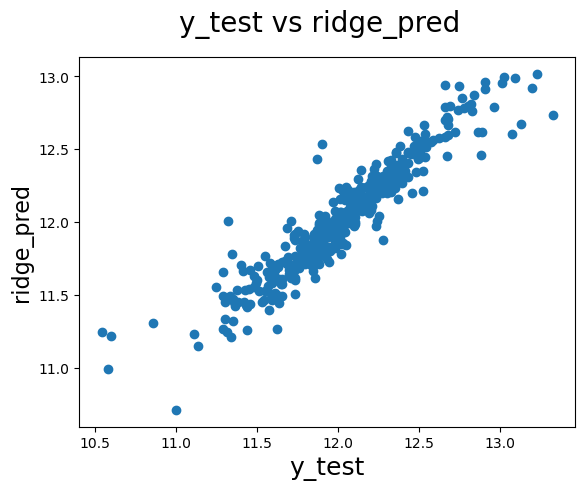

In [518]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

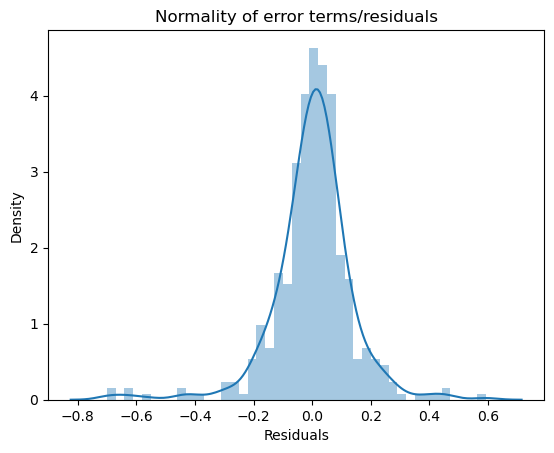

In [519]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [520]:
# Lasso Predictions

In [521]:
lasso_pred = lasso.predict(X_test)

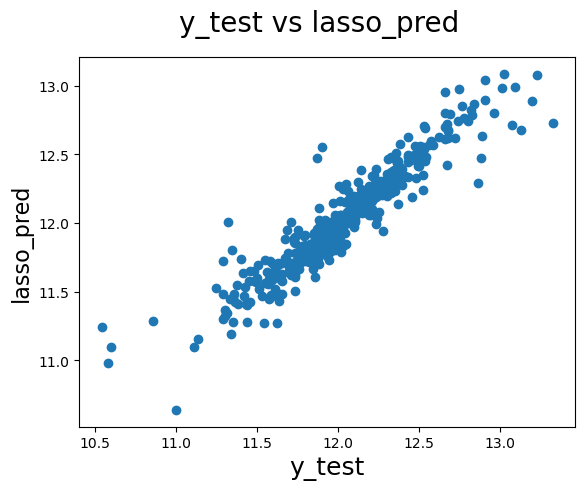

In [522]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()


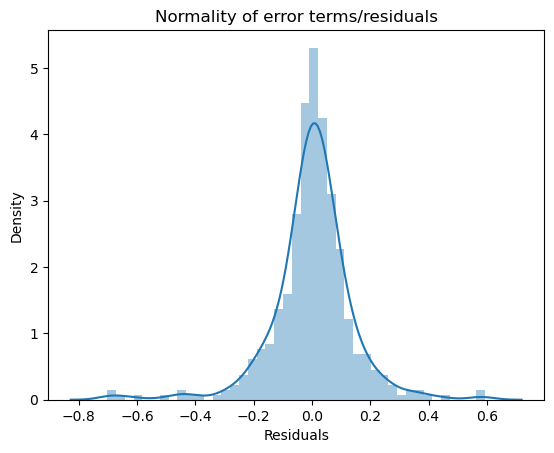

In [523]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [524]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
mssub_class,0.017399,0.008433,0.004807
lot_frontage,0.006250,0.013354,0.000000
lot_area,0.122007,0.115872,0.129950
mas_vnr_area,-0.025005,-0.013927,-0.010836
bsmt_fin_sf1,0.096352,0.141950,0.131529
bsmt_unf_sf,0.025347,0.030678,0.017342
total_bsmt_sf,0.150066,0.153040,0.155003
1st_flr_sf,0.266469,0.219537,0.247965
2nd_flr_sf,0.152510,0.092203,0.122518
gr_liv_area,0.216861,0.208080,0.242888


In [525]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 10.953),
 ('mssub_class', 0.005),
 ('lot_frontage', 0.0),
 ('lot_area', 0.13),
 ('mas_vnr_area', -0.011),
 ('bsmt_fin_sf1', 0.132),
 ('bsmt_unf_sf', 0.017),
 ('total_bsmt_sf', 0.155),
 ('1st_flr_sf', 0.248),
 ('2nd_flr_sf', 0.123),
 ('gr_liv_area', 0.243),
 ('bedroom_abv_gr', 0.017),
 ('tot_rms_abv_grd', 0.11),
 ('garage_area', 0.116),
 ('wood_deck_sf', 0.028),
 ('open_porch_sf', 0.062),
 ('age_of_house', -0.185),
 ('mszoning_FV', 0.289),
 ('mszoning_RH', 0.328),
 ('mszoning_RL', 0.294),
 ('mszoning_RM', 0.271),
 ('street_Pave', -0.0),
 ('lot_shape_IR2', 0.015),
 ('lot_shape_IR3', -0.0),
 ('lot_shape_Reg', 0.005),
 ('land_contour_HLS', 0.001),
 ('land_contour_Low', 0.005),
 ('land_contour_Lvl', 0.014),
 ('utilities_NoSeWa', -0.047),
 ('lot_config_CulDSac', 0.024),
 ('lot_config_FR2', -0.038),
 ('lot_config_FR3', 0.0),
 ('lot_config_Inside', -0.004),
 ('land_slope_Mod', 0.004),
 ('land_slope_Sev', 0.035),
 ('neighborhood_Blueste', -0.0),
 ('neighborhood_BrDale', -0.067),
 

In [526]:
mod = list(zip(cols, model_parameters))

In [527]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,10.953
18,mszoning_RH,0.328
93,overall_qual_10,0.317
19,mszoning_RL,0.294
17,mszoning_FV,0.289
20,mszoning_RM,0.271
8,1st_flr_sf,0.248
10,gr_liv_area,0.243
113,roof_matl_WdShngl,0.227
92,overall_qual_9,0.206


Q1-Which variables are significant in predicting the price of a house?

Ans : The below variables are significant in predicting the prices of a house

    1.mszoning_RH	      
    2.overall_qual_10
    3.mszoning_RL	      
    4.mszoning_FV	      
    5.mszoning_RM	      
    6.1st_flr_sf	      
    7.gr_liv_area	      
    8.roof_matl_WdShngl 
    9.overall_qual_9	  
    10.full_bath_3	     

Q2 -How well those variables describe the price of a house

In [528]:
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,10.953
18,mszoning_RH,0.328
93,overall_qual_10,0.317
19,mszoning_RL,0.294
17,mszoning_FV,0.289
20,mszoning_RM,0.271
8,1st_flr_sf,0.248
10,gr_liv_area,0.243
113,roof_matl_WdShngl,0.227
92,overall_qual_9,0.206


# Problem Statement -Part 2

# Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of alpha for ridge and lasso regression



Ridge Alpha 3

lasso Alpha  0.0001

In [529]:
# Changing the alpha for ridge from alpha = 3 to alpha = 6

#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 6
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9334276150039053
0.8842588176780908
10.699880310003639
8.341301620335436
0.010469550205483012
0.019044067626336612


For alpha = 3 

    R2 Score (Train) (Ridge) = 0.938890

    R2 Score (Test) (Ridge) 0.884055


for alpha = 6

    R2(Train)      0.9333
    R2(Test)       0.88425

Both training and test R2 score after increasing to alpha = 6 would be almost same to R2 score having alpha = 3.

In [530]:
# Lasso alpha from 0.0001 to 0.0002

alpha = 0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 


# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9407400457550951
0.881499257883629
9.524586172389213
8.540179151419705
0.00931955594167242
0.019498125916483346


For alpha = 0.0001

    R2 Score (Train) (Lasso) = 0.944417

    R2 Score (Test)  (Lasso) = 0.879994


for alpha = 0.0002

    R2(Train)                          0.9407400457550951
    R2(Test)                           0.881499257883629


 R2 Score of training got decreased a very very small but test score got increased.

In [531]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge2,Ridge,Lasso,Lasso2
mssub_class,0.008373,0.008433,0.004807,0.002245
lot_frontage,0.018181,0.013354,0.000000,0.000000
lot_area,0.105440,0.115872,0.129950,0.119203
mas_vnr_area,-0.013108,-0.013927,-0.010836,-0.007451
bsmt_fin_sf1,0.137310,0.141950,0.131529,0.136965
bsmt_unf_sf,0.031844,0.030678,0.017342,0.011926
total_bsmt_sf,0.146541,0.153040,0.155003,0.152418
1st_flr_sf,0.202886,0.219537,0.247965,0.250971
2nd_flr_sf,0.085213,0.092203,0.122518,0.119446
gr_liv_area,0.187892,0.208080,0.242888,0.244508


Predictors are same but the coefficent of these predictor has changed

# Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Ans :

    R2(Train) (Ridge)= 0.938890 (Lasso) = 0.944417

    R2(Test) (Ridge)= 0.884055 (Lasso) = 0.879994

    Ridge alpha = 3
    Lasso alpha = 0.0001
    
The r2_score of lasso is better for train but for test ridge is slightly better.  
However We should use lasso model for the predictions as it also does feature selections . Better to use lasso with respect to that and to make the model more robust.

# Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important 
predictor variables now?

In [532]:
X_train.columns

Index(['mssub_class', 'lot_frontage', 'lot_area', 'mas_vnr_area',
       'bsmt_fin_sf1', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'gr_liv_area',
       ...
       'bsmt_full_bath_1', 'bsmt_full_bath_2', 'bsmt_full_bath_3',
       'bsmt_half_bath_1', 'bsmt_half_bath_2', 'full_bath_1', 'full_bath_2',
       'full_bath_3', 'half_bath_1', 'half_bath_2'],
      dtype='object', length=260)

Firstly these variables are most significant in predicting the prices of a house

    1.	mszoning_RH	      
    2.	overall_qual_10
    3.	mszoning_RL	      
    4.	mszoning_FV	      
    5.	mszoning_RM	

In [533]:
X_train1 = X_train.drop(['overall_qual_10', 'mszoning_RH', 'mszoning_RL', 'mszoning_FV', 'mszoning_RM'], axis=1)
X_test1 = X_test.drop(['overall_qual_10', 'mszoning_RH', 'mszoning_RL', 'mszoning_FV', 'mszoning_RM'], axis=1)

In [534]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1, y_train) 
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train1, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso3.predict(X_train1)
y_pred_test = lasso3.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

# lasso model parameters
model_parameters = list(lasso3.coef_ )
model_parameters.insert(0, lasso3.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train1.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.9403135645489316
0.8707219380952721
9.593132580343248
9.316885188199825
0.009386626790942513
0.021271427370319236


,Variable,Coeff
0,constant,11.449
8,1st_flr_sf,0.246
108,roof_matl_WdShngl,0.234
253,full_bath_3,0.227
10,gr_liv_area,0.216
96,overall_cond_9,0.183
235,sale_type_ConLD,0.159
5,bsmt_fin_sf1,0.140
3,lot_area,0.140
220,garage_cars_4,0.138


Now , the 5 most important predictors are :
1. 1st_flr_sf	
2. roof_matl_WdShngl
3. full_bath_3
4. gr_liv_area
5. overall_cond_9

# Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Ans :
The model should be generalized so that the test accuracy should not be much lesser compared to the training score. 
The model should be accurate for test datasets and so it should be generic in nature .
Too much importance should not given to the outliers so that the accuracy predicted by the model is high. 
To ensure that this should not happen , the outliers analysis needs to be done and only those which are relevant to the dataset need to be retained. 
Those outliers which it does not make sense to keep must be handled or removed from the dataset.

If the model is not robust, It cannot be trusted for predictive analysis.
